In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [6]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [7]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [8]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [9]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [10]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
sensor2 = sensor2.reshape(41, 16, 1)

In [14]:
sensor3 = sensor3.reshape(41, 16, 1)

In [15]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [16]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [17]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [18]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.2383 - rmse: 0.4882
Epoch 2/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2381 - rmse: 0.4879
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2378 - rmse: 0.4877
Epoch 4/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2376 - rmse: 0.4874
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2373 - rmse: 0.4872
Epoch 6/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2371 - rmse: 0.4869
Epoch 7/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2369 - rmse: 0.4867
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2366 - rmse: 0.4865
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2364 - rmse: 0.4862
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2362 - rmse: 0.4860
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 0.2198 - rmse: 0.4688
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2196 - rmse: 0.4686
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2194 - rmse: 0.4684
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2192 - rmse: 0.4682
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2190 - rmse: 0.4679
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2188 - rmse: 0.4677
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2186 - rmse: 0.4675
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2184 - rmse: 0.4673
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2182 - rmse: 0.4671
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2180 - rmse: 0.4669
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 0.2031 - rmse: 0.4506
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2029 - rmse: 0.4504
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2027 - rmse: 0.4502
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2025 - rmse: 0.4500
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2023 - rmse: 0.4497
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2021 - rmse: 0.4495
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2019 - rmse: 0.4493
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2017 - rmse: 0.4491
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2015 - rmse: 0.4489
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2013 - rmse: 0.4486
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1860 - rmse: 0.4313
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1858 - rmse: 0.4310
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1856 - rmse: 0.4308
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1854 - rmse: 0.4305
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1852 - rmse: 0.4303
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1849 - rmse: 0.4301
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1847 - rmse: 0.4298
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1845 - rmse: 0.4295
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1843 - rmse: 0.4293
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1841 - rmse: 0.4290
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1674 - rmse: 0.4092
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1672 - rmse: 0.4089
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1669 - rmse: 0.4086
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1667 - rmse: 0.4083
Epoch 342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1664 - rmse: 0.4080
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1662 - rmse: 0.4077
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1660 - rmse: 0.4074
Epoch 345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1657 - rmse: 0.4071
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1655 - rmse: 0.4068
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1653 - rmse: 0.4066
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1476 - rmse: 0.3841
Epoch 423/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1473 - rmse: 0.3838
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1471 - rmse: 0.3835
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1468 - rmse: 0.3832
Epoch 426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1466 - rmse: 0.3829
Epoch 427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1464 - rmse: 0.3826
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1461 - rmse: 0.3823
Epoch 429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1459 - rmse: 0.3820
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1457 - rmse: 0.3817
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1454 - rmse: 0.3813
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1274 - rmse: 0.3570
Epoch 507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1272 - rmse: 0.3567
Epoch 508/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1270 - rmse: 0.3563
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1268 - rmse: 0.3560
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1266 - rmse: 0.3558
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1263 - rmse: 0.3555
Epoch 512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1261 - rmse: 0.3551
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1259 - rmse: 0.3548
Epoch 514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1257 - rmse: 0.3545
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1255 - rmse: 0.3542
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1083 - rmse: 0.3292
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1081 - rmse: 0.3288
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1079 - rmse: 0.3284
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1076 - rmse: 0.3281
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1074 - rmse: 0.3278
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1072 - rmse: 0.3275
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1070 - rmse: 0.3272
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1068 - rmse: 0.3269
Epoch 598/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1067 - rmse: 0.3266
Epoch 599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1065 - rmse: 0.3263
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0914 - rmse: 0.3023
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0912 - rmse: 0.3020
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0910 - rmse: 0.3017
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0909 - rmse: 0.3014
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0907 - rmse: 0.3012
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0905 - rmse: 0.3009
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0904 - rmse: 0.3006
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0902 - rmse: 0.3003
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0900 - rmse: 0.3000
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0898 - rmse: 0.2997
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0761 - rmse: 0.2759
Epoch 759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0760 - rmse: 0.2756
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0758 - rmse: 0.2754
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0757 - rmse: 0.2751
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0754 - rmse: 0.2745
Epoch 764/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0752 - rmse: 0.2743
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0751 - rmse: 0.2740
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0749 - rmse: 0.2737
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0748 - rmse: 0.2734
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0642 - rmse: 0.2533
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0641 - rmse: 0.2531
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0639 - rmse: 0.2528
Epoch 845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0638 - rmse: 0.2526
Epoch 846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0637 - rmse: 0.2523
Epoch 847/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0636 - rmse: 0.2521
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0634 - rmse: 0.2518
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0633 - rmse: 0.2516
Epoch 850/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0632 - rmse: 0.2514
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0631 - rmse: 0.2511
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0507 - rmse: 0.2252
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0505 - rmse: 0.2248
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0503 - rmse: 0.2243
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0501 - rmse: 0.2239
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0500 - rmse: 0.2235
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0498 - rmse: 0.2231
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0496 - rmse: 0.2228
Epoch 933/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0495 - rmse: 0.2224
Epoch 934/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0493 - rmse: 0.2220
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0491 - rmse: 0.2216
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0382 - rmse: 0.1953
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0380 - rmse: 0.1951
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0379 - rmse: 0.1948
Epoch 1013/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0378 - rmse: 0.1945
Epoch 1014/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0377 - rmse: 0.1943
Epoch 1015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0376 - rmse: 0.1940
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0375 - rmse: 0.1937
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0374 - rmse: 0.1934
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1931
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0371 - rmse: 0.1927
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0302 - rmse: 0.1738
Epoch 1094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0301 - rmse: 0.1736
Epoch 1095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0300 - rmse: 0.1733
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0299 - rmse: 0.1730
Epoch 1097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0298 - rmse: 0.1727
Epoch 1098/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0297 - rmse: 0.1725
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0296 - rmse: 0.1721
Epoch 1100/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0295 - rmse: 0.1719
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0295 - rmse: 0.1716
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0294 - rmse: 0.1714
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0241 - rmse: 0.1554
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 1178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0240 - rmse: 0.1548
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0239 - rmse: 0.1546
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0239 - rmse: 0.1544
Epoch 1182/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0238 - rmse: 0.1542
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1540
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1539
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0195 - rmse: 0.1398
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 1262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 1266/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1387
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1274
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 1344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 1347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 1350/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0133 - rmse: 0.1155
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1153
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1152
Epoch 1428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0132 - rmse: 0.1151
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1148
Epoch 1431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0132 - rmse: 0.1147
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1146
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1144
Epoch 1434/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0131 - rmse: 0.1143
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0112 - rmse: 0.1059
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1058
Epoch 1511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0112 - rmse: 0.1057
Epoch 1512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0112 - rmse: 0.1056
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1055
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1054
Epoch 1515/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0111 - rmse: 0.1053
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1053
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1052
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 1593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0977
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 1595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 1599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0971
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0901
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 1677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 1679/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0080 - rmse: 0.0897
Epoch 1680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 1683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 1758/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0834
Epoch 1761/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 1762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 1764/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 1765/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 1842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 1844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 1845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 1847/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 1848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 1849/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0711
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0710
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 1931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 2012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 2015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0604
Epoch 2090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 2093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 2096/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 2174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 2177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 2180/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 2261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 2262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0505
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 2340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 2346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 2422/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 2423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 2424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 2425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 2428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 2506/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 2509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 2512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 2588/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 2590/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 2591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 2594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 2597/10000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 2672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 2675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 2676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 2678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 8.6812e-04 - rmse: 0.0295
Epoch 2751/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6641e-04 - rmse: 0.0294
Epoch 2752/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6479e-04 - rmse: 0.0294
Epoch 2753/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6323e-04 - rmse: 0.0294
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6178e-04 - rmse: 0.0294
Epoch 2755/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6047e-04 - rmse: 0.0293
Epoch 2756/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5894e-04 - rmse: 0.0293
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5753e-04 - rmse: 0.0293
Epoch 2758/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5611e-04 - rmse: 0.0293
Epoch 2759/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5464e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 7.5361e-04 - rmse: 0.0275
Epoch 2831/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5242e-04 - rmse: 0.0274
Epoch 2832/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5127e-04 - rmse: 0.0274
Epoch 2833/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5011e-04 - rmse: 0.0274
Epoch 2834/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4906e-04 - rmse: 0.0274
Epoch 2835/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4799e-04 - rmse: 0.0273
Epoch 2836/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4701e-04 - rmse: 0.0273
Epoch 2837/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4606e-04 - rmse: 0.0273
Epoch 2838/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4504e-04 - rmse: 0.0273
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4406e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 6.6193e-04 - rmse: 0.0257
Epoch 2911/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6086e-04 - rmse: 0.0257
Epoch 2912/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5986e-04 - rmse: 0.0257
Epoch 2913/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5877e-04 - rmse: 0.0257
Epoch 2914/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5783e-04 - rmse: 0.0256
Epoch 2915/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5689e-04 - rmse: 0.0256
Epoch 2916/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5597e-04 - rmse: 0.0256
Epoch 2917/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5498e-04 - rmse: 0.0256
Epoch 2918/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5413e-04 - rmse: 0.0256
Epoch 2919/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5322e-04 - rmse: 0.02

2/2 [==============================] - 0s 9ms/step - loss: 5.8907e-04 - rmse: 0.0243
Epoch 2991/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8752e-04 - rmse: 0.0242
Epoch 2992/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8608e-04 - rmse: 0.0242
Epoch 2993/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8473e-04 - rmse: 0.0242
Epoch 2994/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8349e-04 - rmse: 0.0242
Epoch 2995/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8223e-04 - rmse: 0.0241
Epoch 2996/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8106e-04 - rmse: 0.0241
Epoch 2997/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7993e-04 - rmse: 0.0241
Epoch 2998/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7877e-04 - rmse: 0.0241
Epoch 2999/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7773e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 5.2145e-04 - rmse: 0.0228
Epoch 3071/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2094e-04 - rmse: 0.0228
Epoch 3072/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2057e-04 - rmse: 0.0228
Epoch 3073/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2031e-04 - rmse: 0.0228
Epoch 3074/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2024e-04 - rmse: 0.0228
Epoch 3075/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2038e-04 - rmse: 0.0228
Epoch 3076/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2061e-04 - rmse: 0.0228
Epoch 3077/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2080e-04 - rmse: 0.0228
Epoch 3078/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2090e-04 - rmse: 0.0228
Epoch 3079/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2070e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.7647e-04 - rmse: 0.0218
Epoch 3151/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7576e-04 - rmse: 0.0218
Epoch 3152/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7487e-04 - rmse: 0.0218
Epoch 3153/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7402e-04 - rmse: 0.0218
Epoch 3154/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7321e-04 - rmse: 0.0218
Epoch 3155/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7258e-04 - rmse: 0.0217
Epoch 3156/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7207e-04 - rmse: 0.0217
Epoch 3157/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7203e-04 - rmse: 0.0217
Epoch 3158/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7170e-04 - rmse: 0.0217
Epoch 3159/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7114e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 4.3342e-04 - rmse: 0.0208
Epoch 3231/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3290e-04 - rmse: 0.0208
Epoch 3232/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3220e-04 - rmse: 0.0208
Epoch 3233/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3162e-04 - rmse: 0.0208
Epoch 3234/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3114e-04 - rmse: 0.0208
Epoch 3235/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3059e-04 - rmse: 0.0208
Epoch 3236/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3005e-04 - rmse: 0.0207
Epoch 3237/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2954e-04 - rmse: 0.0207
Epoch 3238/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2902e-04 - rmse: 0.0207
Epoch 3239/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2842e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 3.9862e-04 - rmse: 0.0200
Epoch 3311/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9805e-04 - rmse: 0.0200
Epoch 3312/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9761e-04 - rmse: 0.0199
Epoch 3313/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9717e-04 - rmse: 0.0199
Epoch 3314/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9670e-04 - rmse: 0.0199
Epoch 3315/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9611e-04 - rmse: 0.0199
Epoch 3316/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9567e-04 - rmse: 0.0199
Epoch 3317/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9522e-04 - rmse: 0.0199
Epoch 3318/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9475e-04 - rmse: 0.0199
Epoch 3319/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9426e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 3.6829e-04 - rmse: 0.0192
Epoch 3391/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6786e-04 - rmse: 0.0192
Epoch 3392/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6742e-04 - rmse: 0.0192
Epoch 3393/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6705e-04 - rmse: 0.0192
Epoch 3394/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6670e-04 - rmse: 0.0191
Epoch 3395/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6632e-04 - rmse: 0.0191
Epoch 3396/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6586e-04 - rmse: 0.0191
Epoch 3397/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6552e-04 - rmse: 0.0191
Epoch 3398/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6504e-04 - rmse: 0.0191
Epoch 3399/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6451e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 3.5060e-04 - rmse: 0.0187
Epoch 3471/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5030e-04 - rmse: 0.0187
Epoch 3472/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4996e-04 - rmse: 0.0187
Epoch 3473/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4975e-04 - rmse: 0.0187
Epoch 3474/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4930e-04 - rmse: 0.0187
Epoch 3475/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4890e-04 - rmse: 0.0187
Epoch 3476/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4863e-04 - rmse: 0.0187
Epoch 3477/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4836e-04 - rmse: 0.0187
Epoch 3478/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4806e-04 - rmse: 0.0187
Epoch 3479/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4786e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 3.1810e-04 - rmse: 0.0178
Epoch 3551/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1792e-04 - rmse: 0.0178
Epoch 3552/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1779e-04 - rmse: 0.0178
Epoch 3553/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1769e-04 - rmse: 0.0178
Epoch 3554/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1778e-04 - rmse: 0.0178
Epoch 3555/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1798e-04 - rmse: 0.0178
Epoch 3556/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1840e-04 - rmse: 0.0178
Epoch 3557/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1898e-04 - rmse: 0.0179
Epoch 3558/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1997e-04 - rmse: 0.0179
Epoch 3559/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2057e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.9963e-04 - rmse: 0.0173
Epoch 3631/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9911e-04 - rmse: 0.0173
Epoch 3632/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9860e-04 - rmse: 0.0173
Epoch 3633/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9822e-04 - rmse: 0.0173
Epoch 3634/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9789e-04 - rmse: 0.0173
Epoch 3635/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9763e-04 - rmse: 0.0173
Epoch 3636/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9754e-04 - rmse: 0.0172
Epoch 3637/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9725e-04 - rmse: 0.0172
Epoch 3638/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9703e-04 - rmse: 0.0172
Epoch 3639/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9676e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.8227e-04 - rmse: 0.0168
Epoch 3711/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8233e-04 - rmse: 0.0168
Epoch 3712/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8240e-04 - rmse: 0.0168
Epoch 3713/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8242e-04 - rmse: 0.0168
Epoch 3714/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8283e-04 - rmse: 0.0168
Epoch 3715/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8277e-04 - rmse: 0.0168
Epoch 3716/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8274e-04 - rmse: 0.0168
Epoch 3717/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8238e-04 - rmse: 0.0168
Epoch 3718/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8181e-04 - rmse: 0.0168
Epoch 3719/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8124e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 2.6885e-04 - rmse: 0.0164
Epoch 3791/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6855e-04 - rmse: 0.0164
Epoch 3792/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6802e-04 - rmse: 0.0164
Epoch 3793/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6763e-04 - rmse: 0.0164
Epoch 3794/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6732e-04 - rmse: 0.0164
Epoch 3795/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6740e-04 - rmse: 0.0164
Epoch 3796/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6783e-04 - rmse: 0.0164
Epoch 3797/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6817e-04 - rmse: 0.0164
Epoch 3798/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6843e-04 - rmse: 0.0164
Epoch 3799/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6815e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 2.4816e-04 - rmse: 0.0158
Epoch 3871/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4782e-04 - rmse: 0.0157
Epoch 3872/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4760e-04 - rmse: 0.0157
Epoch 3873/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4738e-04 - rmse: 0.0157
Epoch 3874/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4716e-04 - rmse: 0.0157
Epoch 3875/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4691e-04 - rmse: 0.0157
Epoch 3876/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4667e-04 - rmse: 0.0157
Epoch 3877/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4648e-04 - rmse: 0.0157
Epoch 3878/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4629e-04 - rmse: 0.0157
Epoch 3879/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4639e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.3755e-04 - rmse: 0.0154
Epoch 3951/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3766e-04 - rmse: 0.0154
Epoch 3952/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3709e-04 - rmse: 0.0154
Epoch 3953/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3653e-04 - rmse: 0.0154
Epoch 3954/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3629e-04 - rmse: 0.0154
Epoch 3955/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.3640e-04 - rmse: 0.0154
Epoch 3956/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3694e-04 - rmse: 0.0154
Epoch 3957/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3697e-04 - rmse: 0.0154
Epoch 3958/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3621e-04 - rmse: 0.0154
Epoch 3959/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.3502e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 2.1877e-04 - rmse: 0.0148
Epoch 4031/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1878e-04 - rmse: 0.0148
Epoch 4032/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1923e-04 - rmse: 0.0148
Epoch 4033/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1983e-04 - rmse: 0.0148
Epoch 4034/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2055e-04 - rmse: 0.0149
Epoch 4035/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2168e-04 - rmse: 0.0149
Epoch 4036/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2270e-04 - rmse: 0.0149
Epoch 4037/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2379e-04 - rmse: 0.0150
Epoch 4038/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2432e-04 - rmse: 0.0150
Epoch 4039/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2428e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.0683e-04 - rmse: 0.0144
Epoch 4111/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0656e-04 - rmse: 0.0144
Epoch 4112/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0645e-04 - rmse: 0.0144
Epoch 4113/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0639e-04 - rmse: 0.0144
Epoch 4114/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0616e-04 - rmse: 0.0144
Epoch 4115/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0592e-04 - rmse: 0.0144
Epoch 4116/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0575e-04 - rmse: 0.0143
Epoch 4117/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0554e-04 - rmse: 0.0143
Epoch 4118/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0541e-04 - rmse: 0.0143
Epoch 4119/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0526e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.9518e-04 - rmse: 0.0140
Epoch 4191/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9558e-04 - rmse: 0.0140
Epoch 4192/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9564e-04 - rmse: 0.0140
Epoch 4193/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9591e-04 - rmse: 0.0140
Epoch 4194/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9612e-04 - rmse: 0.0140
Epoch 4195/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9626e-04 - rmse: 0.0140
Epoch 4196/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9643e-04 - rmse: 0.0140
Epoch 4197/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9676e-04 - rmse: 0.0140
Epoch 4198/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9742e-04 - rmse: 0.0141
Epoch 4199/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9752e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.8637e-04 - rmse: 0.0137
Epoch 4271/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8611e-04 - rmse: 0.0136
Epoch 4272/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8583e-04 - rmse: 0.0136
Epoch 4273/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8574e-04 - rmse: 0.0136
Epoch 4274/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8559e-04 - rmse: 0.0136
Epoch 4275/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8544e-04 - rmse: 0.0136
Epoch 4276/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8538e-04 - rmse: 0.0136
Epoch 4277/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8510e-04 - rmse: 0.0136
Epoch 4278/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8492e-04 - rmse: 0.0136
Epoch 4279/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8517e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.7991e-04 - rmse: 0.0134
Epoch 4351/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7937e-04 - rmse: 0.0134
Epoch 4352/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7892e-04 - rmse: 0.0134
Epoch 4353/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7856e-04 - rmse: 0.0134
Epoch 4354/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7799e-04 - rmse: 0.0133
Epoch 4355/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7762e-04 - rmse: 0.0133
Epoch 4356/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7724e-04 - rmse: 0.0133
Epoch 4357/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7684e-04 - rmse: 0.0133
Epoch 4358/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7658e-04 - rmse: 0.0133
Epoch 4359/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7645e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.6959e-04 - rmse: 0.0130
Epoch 4431/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6993e-04 - rmse: 0.0130
Epoch 4432/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7003e-04 - rmse: 0.0130
Epoch 4433/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7020e-04 - rmse: 0.0130
Epoch 4434/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7106e-04 - rmse: 0.0131
Epoch 4435/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7182e-04 - rmse: 0.0131
Epoch 4436/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7214e-04 - rmse: 0.0131
Epoch 4437/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7213e-04 - rmse: 0.0131
Epoch 4438/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7185e-04 - rmse: 0.0131
Epoch 4439/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7146e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.6165e-04 - rmse: 0.0127
Epoch 4511/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6159e-04 - rmse: 0.0127
Epoch 4512/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6150e-04 - rmse: 0.0127
Epoch 4513/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6144e-04 - rmse: 0.0127
Epoch 4514/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6126e-04 - rmse: 0.0127
Epoch 4515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6132e-04 - rmse: 0.0127
Epoch 4516/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6154e-04 - rmse: 0.0127
Epoch 4517/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6193e-04 - rmse: 0.0127
Epoch 4518/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6304e-04 - rmse: 0.0128
Epoch 4519/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6380e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.5586e-04 - rmse: 0.0125
Epoch 4591/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5600e-04 - rmse: 0.0125
Epoch 4592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5598e-04 - rmse: 0.0125
Epoch 4593/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5590e-04 - rmse: 0.0125
Epoch 4594/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5592e-04 - rmse: 0.0125
Epoch 4595/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5594e-04 - rmse: 0.0125
Epoch 4596/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5618e-04 - rmse: 0.0125
Epoch 4597/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5646e-04 - rmse: 0.0125
Epoch 4598/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5708e-04 - rmse: 0.0125
Epoch 4599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5758e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.5211e-04 - rmse: 0.0123
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5203e-04 - rmse: 0.0123
Epoch 4672/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5203e-04 - rmse: 0.0123
Epoch 4673/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5210e-04 - rmse: 0.0123
Epoch 4674/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5170e-04 - rmse: 0.0123
Epoch 4675/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5135e-04 - rmse: 0.0123
Epoch 4676/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5112e-04 - rmse: 0.0123
Epoch 4677/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5113e-04 - rmse: 0.0123
Epoch 4678/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5146e-04 - rmse: 0.0123
Epoch 4679/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5195e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.4930e-04 - rmse: 0.0122
Epoch 4751/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4982e-04 - rmse: 0.0122
Epoch 4752/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5051e-04 - rmse: 0.0123
Epoch 4753/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5075e-04 - rmse: 0.0123
Epoch 4754/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5067e-04 - rmse: 0.0123
Epoch 4755/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5057e-04 - rmse: 0.0123
Epoch 4756/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5073e-04 - rmse: 0.0123
Epoch 4757/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5060e-04 - rmse: 0.0123
Epoch 4758/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5022e-04 - rmse: 0.0123
Epoch 4759/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5016e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.4377e-04 - rmse: 0.0120
Epoch 4831/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4364e-04 - rmse: 0.0120
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4350e-04 - rmse: 0.0120
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4361e-04 - rmse: 0.0120
Epoch 4834/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4353e-04 - rmse: 0.0120
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4351e-04 - rmse: 0.0120
Epoch 4836/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4350e-04 - rmse: 0.0120
Epoch 4837/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4335e-04 - rmse: 0.0120
Epoch 4838/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4305e-04 - rmse: 0.0120
Epoch 4839/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4314e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.4091e-04 - rmse: 0.0119
Epoch 4911/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4086e-04 - rmse: 0.0119
Epoch 4912/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4091e-04 - rmse: 0.0119
Epoch 4913/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4120e-04 - rmse: 0.0119
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4180e-04 - rmse: 0.0119
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4186e-04 - rmse: 0.0119
Epoch 4916/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4137e-04 - rmse: 0.0119
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4060e-04 - rmse: 0.0119
Epoch 4918/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4026e-04 - rmse: 0.0118
Epoch 4919/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4001e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.3585e-04 - rmse: 0.0117
Epoch 4991/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3563e-04 - rmse: 0.0116
Epoch 4992/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3555e-04 - rmse: 0.0116
Epoch 4993/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3549e-04 - rmse: 0.0116
Epoch 4994/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3538e-04 - rmse: 0.0116
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3541e-04 - rmse: 0.0116
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3570e-04 - rmse: 0.0116
Epoch 4997/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3608e-04 - rmse: 0.0117
Epoch 4998/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3607e-04 - rmse: 0.0117
Epoch 4999/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3599e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.3456e-04 - rmse: 0.0116
Epoch 5071/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3463e-04 - rmse: 0.0116
Epoch 5072/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3482e-04 - rmse: 0.0116
Epoch 5073/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3487e-04 - rmse: 0.0116
Epoch 5074/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3458e-04 - rmse: 0.0116
Epoch 5075/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3402e-04 - rmse: 0.0116
Epoch 5076/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3343e-04 - rmse: 0.0116
Epoch 5077/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3294e-04 - rmse: 0.0115
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3277e-04 - rmse: 0.0115
Epoch 5079/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3261e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.3311e-04 - rmse: 0.0115
Epoch 5151/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3274e-04 - rmse: 0.0115
Epoch 5152/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3216e-04 - rmse: 0.0115
Epoch 5153/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3126e-04 - rmse: 0.0115
Epoch 5154/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3097e-04 - rmse: 0.0114
Epoch 5155/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3078e-04 - rmse: 0.0114
Epoch 5156/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3094e-04 - rmse: 0.0114
Epoch 5157/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3091e-04 - rmse: 0.0114
Epoch 5158/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3089e-04 - rmse: 0.0114
Epoch 5159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3082e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.3330e-04 - rmse: 0.0115
Epoch 5231/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3324e-04 - rmse: 0.0115
Epoch 5232/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3294e-04 - rmse: 0.0115
Epoch 5233/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3286e-04 - rmse: 0.0115
Epoch 5234/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3268e-04 - rmse: 0.0115
Epoch 5235/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3242e-04 - rmse: 0.0115
Epoch 5236/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3208e-04 - rmse: 0.0115
Epoch 5237/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3161e-04 - rmse: 0.0115
Epoch 5238/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3148e-04 - rmse: 0.0115
Epoch 5239/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3138e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.3257e-04 - rmse: 0.0115
Epoch 5311/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3368e-04 - rmse: 0.0116
Epoch 5312/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3493e-04 - rmse: 0.0116
Epoch 5313/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3501e-04 - rmse: 0.0116
Epoch 5314/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3389e-04 - rmse: 0.0116
Epoch 5315/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3251e-04 - rmse: 0.0115
Epoch 5316/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3187e-04 - rmse: 0.0115
Epoch 5317/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3167e-04 - rmse: 0.0115
Epoch 5318/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3179e-04 - rmse: 0.0115
Epoch 5319/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3194e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.3343e-04 - rmse: 0.0116
Epoch 5391/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3322e-04 - rmse: 0.0115
Epoch 5392/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3288e-04 - rmse: 0.0115
Epoch 5393/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3189e-04 - rmse: 0.0115
Epoch 5394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3025e-04 - rmse: 0.0114
Epoch 5395/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2828e-04 - rmse: 0.0113
Epoch 5396/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2727e-04 - rmse: 0.0113
Epoch 5397/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2670e-04 - rmse: 0.0113
Epoch 5398/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2687e-04 - rmse: 0.0113
Epoch 5399/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2706e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2606e-04 - rmse: 0.0112
Epoch 5471/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2640e-04 - rmse: 0.0112
Epoch 5472/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2685e-04 - rmse: 0.0113
Epoch 5473/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2692e-04 - rmse: 0.0113
Epoch 5474/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2689e-04 - rmse: 0.0113
Epoch 5475/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2697e-04 - rmse: 0.0113
Epoch 5476/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2710e-04 - rmse: 0.0113
Epoch 5477/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2697e-04 - rmse: 0.0113
Epoch 5478/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2658e-04 - rmse: 0.0113
Epoch 5479/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2621e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.2824e-04 - rmse: 0.0113
Epoch 5551/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2806e-04 - rmse: 0.0113
Epoch 5552/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2758e-04 - rmse: 0.0113
Epoch 5553/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2729e-04 - rmse: 0.0113
Epoch 5554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2726e-04 - rmse: 0.0113
Epoch 5555/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2718e-04 - rmse: 0.0113
Epoch 5556/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2669e-04 - rmse: 0.0113
Epoch 5557/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2606e-04 - rmse: 0.0112
Epoch 5558/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2569e-04 - rmse: 0.0112
Epoch 5559/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2558e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2675e-04 - rmse: 0.0113
Epoch 5631/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2666e-04 - rmse: 0.0113
Epoch 5632/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2677e-04 - rmse: 0.0113
Epoch 5633/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2680e-04 - rmse: 0.0113
Epoch 5634/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2709e-04 - rmse: 0.0113
Epoch 5635/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2710e-04 - rmse: 0.0113
Epoch 5636/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2673e-04 - rmse: 0.0113
Epoch 5637/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2619e-04 - rmse: 0.0112
Epoch 5638/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2623e-04 - rmse: 0.0112
Epoch 5639/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2580e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.2478e-04 - rmse: 0.0112
Epoch 5711/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2496e-04 - rmse: 0.0112
Epoch 5712/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2551e-04 - rmse: 0.0112
Epoch 5713/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2579e-04 - rmse: 0.0112
Epoch 5714/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2589e-04 - rmse: 0.0112
Epoch 5715/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2572e-04 - rmse: 0.0112
Epoch 5716/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2529e-04 - rmse: 0.0112
Epoch 5717/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2538e-04 - rmse: 0.0112
Epoch 5718/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2598e-04 - rmse: 0.0112
Epoch 5719/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2634e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2390e-04 - rmse: 0.0111
Epoch 5791/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2355e-04 - rmse: 0.0111
Epoch 5792/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2312e-04 - rmse: 0.0111
Epoch 5793/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2303e-04 - rmse: 0.0111
Epoch 5794/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2283e-04 - rmse: 0.0111
Epoch 5795/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2281e-04 - rmse: 0.0111
Epoch 5796/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2289e-04 - rmse: 0.0111
Epoch 5797/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2277e-04 - rmse: 0.0111
Epoch 5798/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2278e-04 - rmse: 0.0111
Epoch 5799/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2275e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2408e-04 - rmse: 0.0111
Epoch 5871/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2346e-04 - rmse: 0.0111
Epoch 5872/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2313e-04 - rmse: 0.0111
Epoch 5873/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2319e-04 - rmse: 0.0111
Epoch 5874/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2285e-04 - rmse: 0.0111
Epoch 5875/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2253e-04 - rmse: 0.0111
Epoch 5876/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2232e-04 - rmse: 0.0111
Epoch 5877/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2243e-04 - rmse: 0.0111
Epoch 5878/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2344e-04 - rmse: 0.0111
Epoch 5879/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2462e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2241e-04 - rmse: 0.0111
Epoch 5951/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2240e-04 - rmse: 0.0111
Epoch 5952/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2261e-04 - rmse: 0.0111
Epoch 5953/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2259e-04 - rmse: 0.0111
Epoch 5954/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2265e-04 - rmse: 0.0111
Epoch 5955/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2264e-04 - rmse: 0.0111
Epoch 5956/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2257e-04 - rmse: 0.0111
Epoch 5957/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2233e-04 - rmse: 0.0111
Epoch 5958/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2230e-04 - rmse: 0.0111
Epoch 5959/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2225e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.3298e-04 - rmse: 0.0115
Epoch 6031/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3433e-04 - rmse: 0.0116
Epoch 6032/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3346e-04 - rmse: 0.0116
Epoch 6033/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3157e-04 - rmse: 0.0115
Epoch 6034/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2975e-04 - rmse: 0.0114
Epoch 6035/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2837e-04 - rmse: 0.0113
Epoch 6036/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2680e-04 - rmse: 0.0113
Epoch 6037/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2597e-04 - rmse: 0.0112
Epoch 6038/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2509e-04 - rmse: 0.0112
Epoch 6039/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2432e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.2217e-04 - rmse: 0.0111
Epoch 6111/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2195e-04 - rmse: 0.0110
Epoch 6112/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2167e-04 - rmse: 0.0110
Epoch 6113/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2158e-04 - rmse: 0.0110
Epoch 6114/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2153e-04 - rmse: 0.0110
Epoch 6115/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2168e-04 - rmse: 0.0110
Epoch 6116/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2187e-04 - rmse: 0.0110
Epoch 6117/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2205e-04 - rmse: 0.0110
Epoch 6118/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2315e-04 - rmse: 0.0111
Epoch 6119/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2390e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2334e-04 - rmse: 0.0111
Epoch 6191/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2541e-04 - rmse: 0.0112
Epoch 6192/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2766e-04 - rmse: 0.0113
Epoch 6193/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2926e-04 - rmse: 0.0114
Epoch 6194/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2930e-04 - rmse: 0.0114
Epoch 6195/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2825e-04 - rmse: 0.0113
Epoch 6196/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2651e-04 - rmse: 0.0112
Epoch 6197/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2443e-04 - rmse: 0.0112
Epoch 6198/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2333e-04 - rmse: 0.0111
Epoch 6199/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2265e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2349e-04 - rmse: 0.0111
Epoch 6271/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2422e-04 - rmse: 0.0111
Epoch 6272/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2472e-04 - rmse: 0.0112
Epoch 6273/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2522e-04 - rmse: 0.0112
Epoch 6274/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2610e-04 - rmse: 0.0112
Epoch 6275/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2760e-04 - rmse: 0.0113
Epoch 6276/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2799e-04 - rmse: 0.0113
Epoch 6277/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2691e-04 - rmse: 0.0113
Epoch 6278/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2514e-04 - rmse: 0.0112
Epoch 6279/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2335e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2077e-04 - rmse: 0.0110
Epoch 6351/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2066e-04 - rmse: 0.0110
Epoch 6352/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2061e-04 - rmse: 0.0110
Epoch 6353/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2072e-04 - rmse: 0.0110
Epoch 6354/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2084e-04 - rmse: 0.0110
Epoch 6355/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2091e-04 - rmse: 0.0110
Epoch 6356/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2087e-04 - rmse: 0.0110
Epoch 6357/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2074e-04 - rmse: 0.0110
Epoch 6358/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2075e-04 - rmse: 0.0110
Epoch 6359/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2068e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2168e-04 - rmse: 0.0110
Epoch 6431/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2154e-04 - rmse: 0.0110
Epoch 6432/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2157e-04 - rmse: 0.0110
Epoch 6433/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2205e-04 - rmse: 0.0110
Epoch 6434/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2238e-04 - rmse: 0.0111
Epoch 6435/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2270e-04 - rmse: 0.0111
Epoch 6436/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2311e-04 - rmse: 0.0111
Epoch 6437/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2364e-04 - rmse: 0.0111
Epoch 6438/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2311e-04 - rmse: 0.0111
Epoch 6439/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2206e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.2390e-04 - rmse: 0.0111
Epoch 6511/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2368e-04 - rmse: 0.0111
Epoch 6512/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2320e-04 - rmse: 0.0111
Epoch 6513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2255e-04 - rmse: 0.0111
Epoch 6514/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2176e-04 - rmse: 0.0110
Epoch 6515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2130e-04 - rmse: 0.0110
Epoch 6516/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2094e-04 - rmse: 0.0110
Epoch 6517/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2057e-04 - rmse: 0.0110
Epoch 6518/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2035e-04 - rmse: 0.0110
Epoch 6519/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2023e-04 - rmse: 0.0

2/2 [==============================] - 0s 4ms/step - loss: 1.2036e-04 - rmse: 0.0110
Epoch 6591/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2093e-04 - rmse: 0.0110
Epoch 6592/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2122e-04 - rmse: 0.0110
Epoch 6593/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2134e-04 - rmse: 0.0110
Epoch 6594/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2111e-04 - rmse: 0.0110
Epoch 6595/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2078e-04 - rmse: 0.0110
Epoch 6596/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2047e-04 - rmse: 0.0110
Epoch 6597/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2048e-04 - rmse: 0.0110
Epoch 6598/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2104e-04 - rmse: 0.0110
Epoch 6599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2135e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 1.1950e-04 - rmse: 0.0109
Epoch 6671/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1962e-04 - rmse: 0.0109
Epoch 6672/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2003e-04 - rmse: 0.0110
Epoch 6673/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2061e-04 - rmse: 0.0110
Epoch 6674/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2072e-04 - rmse: 0.0110
Epoch 6675/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2040e-04 - rmse: 0.0110
Epoch 6676/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1990e-04 - rmse: 0.0109
Epoch 6677/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1943e-04 - rmse: 0.0109
Epoch 6678/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1971e-04 - rmse: 0.0109
Epoch 6679/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1981e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1954e-04 - rmse: 0.0109
Epoch 6751/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1963e-04 - rmse: 0.0109
Epoch 6752/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1974e-04 - rmse: 0.0109
Epoch 6753/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1992e-04 - rmse: 0.0110
Epoch 6754/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2002e-04 - rmse: 0.0110
Epoch 6755/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2005e-04 - rmse: 0.0110
Epoch 6756/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2003e-04 - rmse: 0.0110
Epoch 6757/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2000e-04 - rmse: 0.0110
Epoch 6758/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1987e-04 - rmse: 0.0109
Epoch 6759/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1973e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2354e-04 - rmse: 0.0111
Epoch 6831/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2288e-04 - rmse: 0.0111
Epoch 6832/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2169e-04 - rmse: 0.0110
Epoch 6833/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2092e-04 - rmse: 0.0110
Epoch 6834/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1993e-04 - rmse: 0.0110
Epoch 6835/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1965e-04 - rmse: 0.0109
Epoch 6836/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1947e-04 - rmse: 0.0109
Epoch 6837/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1955e-04 - rmse: 0.0109
Epoch 6838/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1952e-04 - rmse: 0.0109
Epoch 6839/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1943e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2524e-04 - rmse: 0.0112
Epoch 6911/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2357e-04 - rmse: 0.0111
Epoch 6912/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2315e-04 - rmse: 0.0111
Epoch 6913/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2341e-04 - rmse: 0.0111
Epoch 6914/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2498e-04 - rmse: 0.0112
Epoch 6915/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2597e-04 - rmse: 0.0112
Epoch 6916/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2600e-04 - rmse: 0.0112
Epoch 6917/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2572e-04 - rmse: 0.0112
Epoch 6918/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2563e-04 - rmse: 0.0112
Epoch 6919/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2721e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.1914e-04 - rmse: 0.0109
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1956e-04 - rmse: 0.0109
Epoch 6992/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2060e-04 - rmse: 0.0110
Epoch 6993/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2106e-04 - rmse: 0.0110
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2123e-04 - rmse: 0.0110
Epoch 6995/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2156e-04 - rmse: 0.0110
Epoch 6996/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2226e-04 - rmse: 0.0111
Epoch 6997/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2309e-04 - rmse: 0.0111
Epoch 6998/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2418e-04 - rmse: 0.0111
Epoch 6999/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2495e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.2231e-04 - rmse: 0.0111
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2278e-04 - rmse: 0.0111
Epoch 7072/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2246e-04 - rmse: 0.0111
Epoch 7073/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2166e-04 - rmse: 0.0110
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2090e-04 - rmse: 0.0110
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2055e-04 - rmse: 0.0110
Epoch 7076/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2018e-04 - rmse: 0.0110
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1999e-04 - rmse: 0.0110
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1977e-04 - rmse: 0.0109
Epoch 7079/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1995e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1959e-04 - rmse: 0.0109
Epoch 7151/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1988e-04 - rmse: 0.0109
Epoch 7152/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1982e-04 - rmse: 0.0109
Epoch 7153/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1952e-04 - rmse: 0.0109
Epoch 7154/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1925e-04 - rmse: 0.0109
Epoch 7155/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1905e-04 - rmse: 0.0109
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1915e-04 - rmse: 0.0109
Epoch 7157/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1931e-04 - rmse: 0.0109
Epoch 7158/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1967e-04 - rmse: 0.0109
Epoch 7159/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2009e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1902e-04 - rmse: 0.0109
Epoch 7231/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1882e-04 - rmse: 0.0109
Epoch 7232/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1874e-04 - rmse: 0.0109
Epoch 7233/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1867e-04 - rmse: 0.0109
Epoch 7234/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1893e-04 - rmse: 0.0109
Epoch 7235/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1886e-04 - rmse: 0.0109
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1871e-04 - rmse: 0.0109
Epoch 7237/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1870e-04 - rmse: 0.0109
Epoch 7238/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1868e-04 - rmse: 0.0109
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1877e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1854e-04 - rmse: 0.0109
Epoch 7311/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1838e-04 - rmse: 0.0109
Epoch 7312/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1823e-04 - rmse: 0.0109
Epoch 7313/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1815e-04 - rmse: 0.0109
Epoch 7314/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1821e-04 - rmse: 0.0109
Epoch 7315/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1818e-04 - rmse: 0.0109
Epoch 7316/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1814e-04 - rmse: 0.0109
Epoch 7317/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1806e-04 - rmse: 0.0109
Epoch 7318/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1817e-04 - rmse: 0.0109
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1849e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.2370e-04 - rmse: 0.0111
Epoch 7391/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2309e-04 - rmse: 0.0111
Epoch 7392/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2261e-04 - rmse: 0.0111
Epoch 7393/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2225e-04 - rmse: 0.0111
Epoch 7394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2241e-04 - rmse: 0.0111
Epoch 7395/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2241e-04 - rmse: 0.0111
Epoch 7396/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2206e-04 - rmse: 0.0110
Epoch 7397/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2178e-04 - rmse: 0.0110
Epoch 7398/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2165e-04 - rmse: 0.0110
Epoch 7399/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2077e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.1968e-04 - rmse: 0.0109
Epoch 7471/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2009e-04 - rmse: 0.0110
Epoch 7472/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2058e-04 - rmse: 0.0110
Epoch 7473/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2107e-04 - rmse: 0.0110
Epoch 7474/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2111e-04 - rmse: 0.0110
Epoch 7475/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2101e-04 - rmse: 0.0110
Epoch 7476/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2130e-04 - rmse: 0.0110
Epoch 7477/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2139e-04 - rmse: 0.0110
Epoch 7478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2140e-04 - rmse: 0.0110
Epoch 7479/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2168e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.1769e-04 - rmse: 0.0108
Epoch 7551/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1818e-04 - rmse: 0.0109
Epoch 7552/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1964e-04 - rmse: 0.0109
Epoch 7553/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2103e-04 - rmse: 0.0110
Epoch 7554/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2241e-04 - rmse: 0.0111
Epoch 7555/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2342e-04 - rmse: 0.0111
Epoch 7556/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2365e-04 - rmse: 0.0111
Epoch 7557/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2366e-04 - rmse: 0.0111
Epoch 7558/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2408e-04 - rmse: 0.0111
Epoch 7559/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2486e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1755e-04 - rmse: 0.0108
Epoch 7631/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1762e-04 - rmse: 0.0108
Epoch 7632/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1766e-04 - rmse: 0.0108
Epoch 7633/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1781e-04 - rmse: 0.0109
Epoch 7634/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1791e-04 - rmse: 0.0109
Epoch 7635/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1793e-04 - rmse: 0.0109
Epoch 7636/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1816e-04 - rmse: 0.0109
Epoch 7637/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1804e-04 - rmse: 0.0109
Epoch 7638/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1768e-04 - rmse: 0.0108
Epoch 7639/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1739e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1764e-04 - rmse: 0.0108
Epoch 7711/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1746e-04 - rmse: 0.0108
Epoch 7712/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1703e-04 - rmse: 0.0108
Epoch 7713/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1695e-04 - rmse: 0.0108
Epoch 7714/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1735e-04 - rmse: 0.0108
Epoch 7715/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1740e-04 - rmse: 0.0108
Epoch 7716/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1758e-04 - rmse: 0.0108
Epoch 7717/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1828e-04 - rmse: 0.0109
Epoch 7718/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1836e-04 - rmse: 0.0109
Epoch 7719/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1836e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1898e-04 - rmse: 0.0109
Epoch 7791/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1878e-04 - rmse: 0.0109
Epoch 7792/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1847e-04 - rmse: 0.0109
Epoch 7793/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1840e-04 - rmse: 0.0109
Epoch 7794/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1793e-04 - rmse: 0.0109
Epoch 7795/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1731e-04 - rmse: 0.0108
Epoch 7796/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1710e-04 - rmse: 0.0108
Epoch 7797/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1685e-04 - rmse: 0.0108
Epoch 7798/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1686e-04 - rmse: 0.0108
Epoch 7799/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1686e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.1758e-04 - rmse: 0.0108
Epoch 7871/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1755e-04 - rmse: 0.0108
Epoch 7872/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1780e-04 - rmse: 0.0109
Epoch 7873/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1786e-04 - rmse: 0.0109
Epoch 7874/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1779e-04 - rmse: 0.0109
Epoch 7875/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1779e-04 - rmse: 0.0109
Epoch 7876/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1805e-04 - rmse: 0.0109
Epoch 7877/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1784e-04 - rmse: 0.0109
Epoch 7878/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1746e-04 - rmse: 0.0108
Epoch 7879/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1729e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 1.1842e-04 - rmse: 0.0109
Epoch 7951/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1843e-04 - rmse: 0.0109
Epoch 7952/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1877e-04 - rmse: 0.0109
Epoch 7953/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1893e-04 - rmse: 0.0109
Epoch 7954/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1886e-04 - rmse: 0.0109
Epoch 7955/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1850e-04 - rmse: 0.0109
Epoch 7956/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1807e-04 - rmse: 0.0109
Epoch 7957/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1779e-04 - rmse: 0.0109
Epoch 7958/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1775e-04 - rmse: 0.0109
Epoch 7959/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1789e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1720e-04 - rmse: 0.0108
Epoch 8031/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1719e-04 - rmse: 0.0108
Epoch 8032/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1755e-04 - rmse: 0.0108
Epoch 8033/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1793e-04 - rmse: 0.0109
Epoch 8034/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1819e-04 - rmse: 0.0109
Epoch 8035/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1872e-04 - rmse: 0.0109
Epoch 8036/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1876e-04 - rmse: 0.0109
Epoch 8037/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1851e-04 - rmse: 0.0109
Epoch 8038/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1871e-04 - rmse: 0.0109
Epoch 8039/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1903e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1723e-04 - rmse: 0.0108
Epoch 8111/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1637e-04 - rmse: 0.0108
Epoch 8112/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1674e-04 - rmse: 0.0108
Epoch 8113/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1661e-04 - rmse: 0.0108
Epoch 8114/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1657e-04 - rmse: 0.0108
Epoch 8115/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1641e-04 - rmse: 0.0108
Epoch 8116/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1647e-04 - rmse: 0.0108
Epoch 8117/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1690e-04 - rmse: 0.0108
Epoch 8118/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1758e-04 - rmse: 0.0108
Epoch 8119/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1851e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2826e-04 - rmse: 0.0113
Epoch 8191/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2748e-04 - rmse: 0.0113
Epoch 8192/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2537e-04 - rmse: 0.0112
Epoch 8193/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2307e-04 - rmse: 0.0111
Epoch 8194/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2137e-04 - rmse: 0.0110
Epoch 8195/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2135e-04 - rmse: 0.0110
Epoch 8196/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2159e-04 - rmse: 0.0110
Epoch 8197/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2153e-04 - rmse: 0.0110
Epoch 8198/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2102e-04 - rmse: 0.0110
Epoch 8199/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2021e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2611e-04 - rmse: 0.0112
Epoch 8271/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2500e-04 - rmse: 0.0112
Epoch 8272/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2326e-04 - rmse: 0.0111
Epoch 8273/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2166e-04 - rmse: 0.0110
Epoch 8274/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1968e-04 - rmse: 0.0109
Epoch 8275/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1832e-04 - rmse: 0.0109
Epoch 8276/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1721e-04 - rmse: 0.0108
Epoch 8277/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1664e-04 - rmse: 0.0108
Epoch 8278/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1609e-04 - rmse: 0.0108
Epoch 8279/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1576e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.1627e-04 - rmse: 0.0108
Epoch 8351/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1634e-04 - rmse: 0.0108
Epoch 8352/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1640e-04 - rmse: 0.0108
Epoch 8353/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1638e-04 - rmse: 0.0108
Epoch 8354/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1638e-04 - rmse: 0.0108
Epoch 8355/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1621e-04 - rmse: 0.0108
Epoch 8356/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1588e-04 - rmse: 0.0108
Epoch 8357/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1572e-04 - rmse: 0.0108
Epoch 8358/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1549e-04 - rmse: 0.0107
Epoch 8359/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1583e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.2206e-04 - rmse: 0.0110
Epoch 8431/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2134e-04 - rmse: 0.0110
Epoch 8432/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2124e-04 - rmse: 0.0110
Epoch 8433/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2031e-04 - rmse: 0.0110
Epoch 8434/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1855e-04 - rmse: 0.0109
Epoch 8435/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1704e-04 - rmse: 0.0108
Epoch 8436/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1596e-04 - rmse: 0.0108
Epoch 8437/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1547e-04 - rmse: 0.0107
Epoch 8438/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1565e-04 - rmse: 0.0108
Epoch 8439/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1619e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.1904e-04 - rmse: 0.0109
Epoch 8511/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2097e-04 - rmse: 0.0110
Epoch 8512/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2390e-04 - rmse: 0.0111
Epoch 8513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2608e-04 - rmse: 0.0112
Epoch 8514/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2719e-04 - rmse: 0.0113
Epoch 8515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2834e-04 - rmse: 0.0113
Epoch 8516/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2994e-04 - rmse: 0.0114
Epoch 8517/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2994e-04 - rmse: 0.0114
Epoch 8518/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2792e-04 - rmse: 0.0113
Epoch 8519/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2540e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.1836e-04 - rmse: 0.0109
Epoch 8591/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2010e-04 - rmse: 0.0110
Epoch 8592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2079e-04 - rmse: 0.0110
Epoch 8593/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2039e-04 - rmse: 0.0110
Epoch 8594/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1936e-04 - rmse: 0.0109
Epoch 8595/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1816e-04 - rmse: 0.0109
Epoch 8596/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1690e-04 - rmse: 0.0108
Epoch 8597/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1609e-04 - rmse: 0.0108
Epoch 8598/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1556e-04 - rmse: 0.0107
Epoch 8599/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1506e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1584e-04 - rmse: 0.0108
Epoch 8671/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1650e-04 - rmse: 0.0108
Epoch 8672/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1708e-04 - rmse: 0.0108
Epoch 8673/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1775e-04 - rmse: 0.0109
Epoch 8674/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1915e-04 - rmse: 0.0109
Epoch 8675/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2082e-04 - rmse: 0.0110
Epoch 8676/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2173e-04 - rmse: 0.0110
Epoch 8677/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2301e-04 - rmse: 0.0111
Epoch 8678/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2434e-04 - rmse: 0.0112
Epoch 8679/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2559e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2917e-04 - rmse: 0.0114
Epoch 8751/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2703e-04 - rmse: 0.0113
Epoch 8752/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2458e-04 - rmse: 0.0112
Epoch 8753/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2323e-04 - rmse: 0.0111
Epoch 8754/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2163e-04 - rmse: 0.0110
Epoch 8755/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1975e-04 - rmse: 0.0109
Epoch 8756/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1838e-04 - rmse: 0.0109
Epoch 8757/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1761e-04 - rmse: 0.0108
Epoch 8758/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1724e-04 - rmse: 0.0108
Epoch 8759/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1684e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.1603e-04 - rmse: 0.0108
Epoch 8831/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1572e-04 - rmse: 0.0108
Epoch 8832/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1546e-04 - rmse: 0.0107
Epoch 8833/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1531e-04 - rmse: 0.0107
Epoch 8834/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1493e-04 - rmse: 0.0107
Epoch 8835/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1488e-04 - rmse: 0.0107
Epoch 8836/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1484e-04 - rmse: 0.0107
Epoch 8837/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1508e-04 - rmse: 0.0107
Epoch 8838/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1570e-04 - rmse: 0.0108
Epoch 8839/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1683e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1922e-04 - rmse: 0.0109
Epoch 8911/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1898e-04 - rmse: 0.0109
Epoch 8912/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1782e-04 - rmse: 0.0109
Epoch 8913/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1631e-04 - rmse: 0.0108
Epoch 8914/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1514e-04 - rmse: 0.0107
Epoch 8915/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1434e-04 - rmse: 0.0107
Epoch 8916/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1466e-04 - rmse: 0.0107
Epoch 8917/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1455e-04 - rmse: 0.0107
Epoch 8918/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1463e-04 - rmse: 0.0107
Epoch 8919/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1489e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.1796e-04 - rmse: 0.0109
Epoch 8991/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1635e-04 - rmse: 0.0108
Epoch 8992/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1569e-04 - rmse: 0.0108
Epoch 8993/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1493e-04 - rmse: 0.0107
Epoch 8994/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1502e-04 - rmse: 0.0107
Epoch 8995/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1533e-04 - rmse: 0.0107
Epoch 8996/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1518e-04 - rmse: 0.0107
Epoch 8997/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1503e-04 - rmse: 0.0107
Epoch 8998/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1486e-04 - rmse: 0.0107
Epoch 8999/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1487e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.1528e-04 - rmse: 0.0107
Epoch 9071/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1655e-04 - rmse: 0.0108
Epoch 9072/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1807e-04 - rmse: 0.0109
Epoch 9073/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1910e-04 - rmse: 0.0109
Epoch 9074/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1896e-04 - rmse: 0.0109
Epoch 9075/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1796e-04 - rmse: 0.0109
Epoch 9076/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1692e-04 - rmse: 0.0108
Epoch 9077/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1590e-04 - rmse: 0.0108
Epoch 9078/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1543e-04 - rmse: 0.0107
Epoch 9079/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1487e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1390e-04 - rmse: 0.0107
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1498e-04 - rmse: 0.0107
Epoch 9152/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1609e-04 - rmse: 0.0108
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1656e-04 - rmse: 0.0108
Epoch 9154/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1646e-04 - rmse: 0.0108
Epoch 9155/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1646e-04 - rmse: 0.0108
Epoch 9156/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1646e-04 - rmse: 0.0108
Epoch 9157/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1642e-04 - rmse: 0.0108
Epoch 9158/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1618e-04 - rmse: 0.0108
Epoch 9159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1559e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1662e-04 - rmse: 0.0108
Epoch 9231/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1751e-04 - rmse: 0.0108
Epoch 9232/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1755e-04 - rmse: 0.0108
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1732e-04 - rmse: 0.0108
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1752e-04 - rmse: 0.0108
Epoch 9235/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1700e-04 - rmse: 0.0108
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1601e-04 - rmse: 0.0108
Epoch 9237/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1541e-04 - rmse: 0.0107
Epoch 9238/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1497e-04 - rmse: 0.0107
Epoch 9239/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1464e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.1365e-04 - rmse: 0.0107
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1354e-04 - rmse: 0.0107
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1358e-04 - rmse: 0.0107
Epoch 9313/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1366e-04 - rmse: 0.0107
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1404e-04 - rmse: 0.0107
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1413e-04 - rmse: 0.0107
Epoch 9316/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1447e-04 - rmse: 0.0107
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1458e-04 - rmse: 0.0107
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1454e-04 - rmse: 0.0107
Epoch 9319/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1466e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1364e-04 - rmse: 0.0107
Epoch 9391/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1344e-04 - rmse: 0.0107
Epoch 9392/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1345e-04 - rmse: 0.0107
Epoch 9393/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1353e-04 - rmse: 0.0107
Epoch 9394/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1367e-04 - rmse: 0.0107
Epoch 9395/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1385e-04 - rmse: 0.0107
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1379e-04 - rmse: 0.0107
Epoch 9397/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1370e-04 - rmse: 0.0107
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1365e-04 - rmse: 0.0107
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1431e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1792e-04 - rmse: 0.0109
Epoch 9471/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1888e-04 - rmse: 0.0109
Epoch 9472/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1871e-04 - rmse: 0.0109
Epoch 9473/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1819e-04 - rmse: 0.0109
Epoch 9474/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1808e-04 - rmse: 0.0109
Epoch 9475/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1757e-04 - rmse: 0.0108
Epoch 9476/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1689e-04 - rmse: 0.0108
Epoch 9477/10000
2/2 [==============================] - ETA: 0s - loss: 1.1117e-04 - rmse: 0.01 - 0s 8ms/step - loss: 1.1655e-04 - rmse: 0.0108
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1697e-04 - rmse: 0.0108
Epoch 9479/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 1.1477e-04 - rmse: 0.0107
Epoch 9551/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1489e-04 - rmse: 0.0107
Epoch 9552/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1534e-04 - rmse: 0.0107
Epoch 9553/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1549e-04 - rmse: 0.0107
Epoch 9554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1555e-04 - rmse: 0.0107
Epoch 9555/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1551e-04 - rmse: 0.0107
Epoch 9556/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1520e-04 - rmse: 0.0107
Epoch 9557/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1437e-04 - rmse: 0.0107
Epoch 9558/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1357e-04 - rmse: 0.0107
Epoch 9559/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1295e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.1937e-04 - rmse: 0.0109
Epoch 9631/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1760e-04 - rmse: 0.0108
Epoch 9632/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1518e-04 - rmse: 0.0107
Epoch 9633/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1313e-04 - rmse: 0.0106
Epoch 9634/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1201e-04 - rmse: 0.0106
Epoch 9635/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1128e-04 - rmse: 0.0105
Epoch 9636/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1121e-04 - rmse: 0.0105
Epoch 9637/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1117e-04 - rmse: 0.0105
Epoch 9638/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1116e-04 - rmse: 0.0105
Epoch 9639/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1116e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1068e-04 - rmse: 0.0105
Epoch 9711/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1062e-04 - rmse: 0.0105
Epoch 9712/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1058e-04 - rmse: 0.0105
Epoch 9713/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1060e-04 - rmse: 0.0105
Epoch 9714/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1056e-04 - rmse: 0.0105
Epoch 9715/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1054e-04 - rmse: 0.0105
Epoch 9716/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1053e-04 - rmse: 0.0105
Epoch 9717/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1054e-04 - rmse: 0.0105
Epoch 9718/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1053e-04 - rmse: 0.0105
Epoch 9719/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1050e-04 - rmse: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 1.1207e-04 - rmse: 0.0106
Epoch 9791/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1218e-04 - rmse: 0.0106
Epoch 9792/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1234e-04 - rmse: 0.0106
Epoch 9793/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1277e-04 - rmse: 0.0106
Epoch 9794/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1338e-04 - rmse: 0.0106
Epoch 9795/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1515e-04 - rmse: 0.0107
Epoch 9796/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1763e-04 - rmse: 0.0108
Epoch 9797/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1873e-04 - rmse: 0.0109
Epoch 9798/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1987e-04 - rmse: 0.0109
Epoch 9799/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2038e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1009e-04 - rmse: 0.0105
Epoch 9871/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1007e-04 - rmse: 0.0105
Epoch 9872/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1002e-04 - rmse: 0.0105
Epoch 9873/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0990e-04 - rmse: 0.0105
Epoch 9874/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0989e-04 - rmse: 0.0105
Epoch 9875/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0999e-04 - rmse: 0.0105
Epoch 9876/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1016e-04 - rmse: 0.0105
Epoch 9877/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1049e-04 - rmse: 0.0105
Epoch 9878/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1117e-04 - rmse: 0.0105
Epoch 9879/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1202e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 1.1083e-04 - rmse: 0.0105
Epoch 9951/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1032e-04 - rmse: 0.0105
Epoch 9952/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1007e-04 - rmse: 0.0105
Epoch 9953/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0992e-04 - rmse: 0.0105
Epoch 9954/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0979e-04 - rmse: 0.0105
Epoch 9955/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0978e-04 - rmse: 0.0105
Epoch 9956/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1002e-04 - rmse: 0.0105
Epoch 9957/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1007e-04 - rmse: 0.0105
Epoch 9958/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1015e-04 - rmse: 0.0105
Epoch 9959/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1021e-04 - rmse: 0.01

In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:01:50.840104


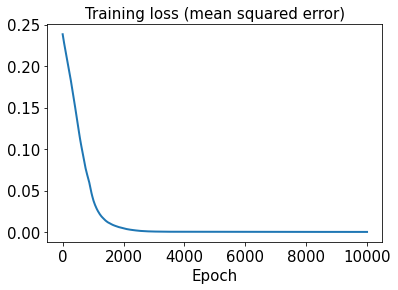

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

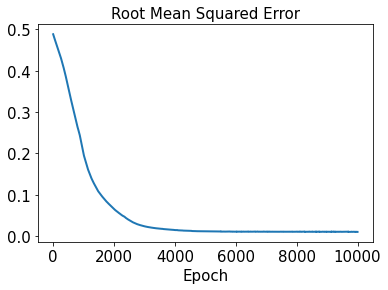

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [25]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [26]:
error_train_abs1 = np.abs(decoded_sensor_train1 - x_train1)

In [27]:
error_test_abs1 = np.abs(decoded_sensor_test1 - x_test1)

In [28]:
error_train_abs1

array([[[1.88732092e-02],
        [6.21445615e-03],
        [1.47014843e-02],
        [1.42529891e-02],
        [6.18113716e-03],
        [2.15883796e-02],
        [7.12004442e-03],
        [1.70057402e-02],
        [1.72517882e-02],
        [6.75887008e-03],
        [2.17428748e-02],
        [6.30968947e-03],
        [1.61928819e-02],
        [1.68929086e-02],
        [7.10764666e-03],
        [1.84481685e-02]],

       [[3.45774690e-03],
        [9.24852710e-04],
        [2.42609602e-03],
        [2.23714930e-03],
        [5.22342544e-04],
        [4.95924751e-03],
        [1.08271561e-03],
        [3.89475447e-03],
        [4.06140905e-03],
        [1.40312038e-03],
        [5.08298675e-03],
        [1.17134772e-03],
        [3.33792788e-03],
        [3.70092016e-03],
        [1.70281253e-03],
        [3.24317018e-03]],

       [[2.10671877e-02],
        [7.07733901e-03],
        [1.61426022e-02],
        [1.55004516e-02],
        [6.89241560e-03],
        [2.53063296e-02],
        

In [29]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.02156488419602383


In [30]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.033947112481356685


In [31]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [32]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5887 - rmse: 1.6089
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5867 - rmse: 1.6083
Epoch 3/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5847 - rmse: 1.6077
Epoch 4/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5828 - rmse: 1.6071
Epoch 5/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5808 - rmse: 1.6065
Epoch 6/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5788 - rmse: 1.6059
Epoch 7/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5768 - rmse: 1.6053
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5749 - rmse: 1.6046
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5730 - rmse: 1.6040
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5710 - rmse: 1.6034
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 2.4480 - rmse: 1.5646
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4467 - rmse: 1.5642
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4453 - rmse: 1.5637
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4439 - rmse: 1.5633
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4425 - rmse: 1.5629
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4412 - rmse: 1.5624
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4399 - rmse: 1.5620
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4386 - rmse: 1.5616
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4373 - rmse: 1.5612
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4360 - rmse: 1.5608
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 2.3498 - rmse: 1.5329
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3487 - rmse: 1.5325
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3477 - rmse: 1.5322
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3466 - rmse: 1.5319
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3456 - rmse: 1.5315
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3445 - rmse: 1.5312
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3435 - rmse: 1.5308
Epoch 177/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3424 - rmse: 1.5305
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3414 - rmse: 1.5302
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3404 - rmse: 1.5298
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 2.2641 - rmse: 1.5047
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2631 - rmse: 1.5043
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2621 - rmse: 1.5040
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2611 - rmse: 1.5037
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2601 - rmse: 1.5034
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2591 - rmse: 1.5030
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2581 - rmse: 1.5027
Epoch 261/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2571 - rmse: 1.5024
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2561 - rmse: 1.5020
Epoch 263/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2551 - rmse: 1.5017
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 2.1773 - rmse: 1.4756
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1762 - rmse: 1.4752
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1752 - rmse: 1.4749
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1742 - rmse: 1.4745
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1732 - rmse: 1.4742
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1722 - rmse: 1.4738
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1711 - rmse: 1.4735
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1701 - rmse: 1.4731
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1691 - rmse: 1.4728
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1681 - rmse: 1.4724
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 2.0871 - rmse: 1.4447
Epoch 423/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0860 - rmse: 1.4443
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0850 - rmse: 1.4439
Epoch 425/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0839 - rmse: 1.4436
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0828 - rmse: 1.4432
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0817 - rmse: 1.4428
Epoch 428/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0806 - rmse: 1.4424
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0795 - rmse: 1.4420
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0784 - rmse: 1.4417
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0772 - rmse: 1.4413
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.9875 - rmse: 1.4098
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9864 - rmse: 1.4094
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9852 - rmse: 1.4090
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9840 - rmse: 1.4085
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9827 - rmse: 1.4081
Epoch 511/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9815 - rmse: 1.4076
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9802 - rmse: 1.4072
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9790 - rmse: 1.4068
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9778 - rmse: 1.4063
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9765 - rmse: 1.4059
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.8787 - rmse: 1.3707
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8774 - rmse: 1.3702
Epoch 592/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8761 - rmse: 1.3697
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8747 - rmse: 1.3692
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8734 - rmse: 1.3687
Epoch 595/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8719 - rmse: 1.3682
Epoch 596/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8705 - rmse: 1.3677
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8690 - rmse: 1.3671
Epoch 598/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8675 - rmse: 1.3666
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8660 - rmse: 1.3660
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 1.7548 - rmse: 1.3247
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7533 - rmse: 1.3241
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7517 - rmse: 1.3235
Epoch 677/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7501 - rmse: 1.3229
Epoch 678/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7485 - rmse: 1.3223
Epoch 679/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7468 - rmse: 1.3217
Epoch 680/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7452 - rmse: 1.3211
Epoch 681/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7435 - rmse: 1.3204
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7419 - rmse: 1.3198
Epoch 683/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7404 - rmse: 1.3192
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.6252 - rmse: 1.2748
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6235 - rmse: 1.2742
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6218 - rmse: 1.2735
Epoch 761/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6201 - rmse: 1.2728
Epoch 762/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6184 - rmse: 1.2722
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6168 - rmse: 1.2715
Epoch 764/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6152 - rmse: 1.2709
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6135 - rmse: 1.2702
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6119 - rmse: 1.2696
Epoch 767/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6103 - rmse: 1.2690
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.4925 - rmse: 1.2217
Epoch 843/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4909 - rmse: 1.2210
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4893 - rmse: 1.2204
Epoch 845/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4878 - rmse: 1.2197
Epoch 846/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4862 - rmse: 1.2191
Epoch 847/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4847 - rmse: 1.2185
Epoch 848/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4832 - rmse: 1.2179
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4816 - rmse: 1.2172
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4800 - rmse: 1.2166
Epoch 851/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4785 - rmse: 1.2159
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.3634 - rmse: 1.1677
Epoch 927/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3619 - rmse: 1.1670
Epoch 928/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3604 - rmse: 1.1664
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3590 - rmse: 1.1657
Epoch 930/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3575 - rmse: 1.1651
Epoch 931/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3561 - rmse: 1.1645
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3547 - rmse: 1.1639
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3532 - rmse: 1.1633
Epoch 934/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3517 - rmse: 1.1626
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3502 - rmse: 1.1620
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2398 - rmse: 1.1134
Epoch 1011/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2384 - rmse: 1.1128
Epoch 1012/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2370 - rmse: 1.1122
Epoch 1013/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2356 - rmse: 1.1116
Epoch 1014/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2342 - rmse: 1.1109
Epoch 1015/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2328 - rmse: 1.1103
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2315 - rmse: 1.1097
Epoch 1017/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2302 - rmse: 1.1091
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2288 - rmse: 1.1085
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2275 - rmse: 1.1079
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.1219 - rmse: 1.0592
Epoch 1094/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1205 - rmse: 1.0585
Epoch 1095/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1191 - rmse: 1.0579
Epoch 1096/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1177 - rmse: 1.0572
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1163 - rmse: 1.0565
Epoch 1098/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1148 - rmse: 1.0558
Epoch 1099/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1134 - rmse: 1.0552
Epoch 1100/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1120 - rmse: 1.0545
Epoch 1101/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1106 - rmse: 1.0538
Epoch 1102/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1093 - rmse: 1.0532
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.0128 - rmse: 1.0064
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0114 - rmse: 1.0057
Epoch 1178/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0101 - rmse: 1.0050
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0087 - rmse: 1.0044
Epoch 1180/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0074 - rmse: 1.0037
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0061 - rmse: 1.0031
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0048 - rmse: 1.0024
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0035 - rmse: 1.0017
Epoch 1184/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0022 - rmse: 1.0011
Epoch 1185/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0008 - rmse: 1.0004
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.9083 - rmse: 0.9530
Epoch 1260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9071 - rmse: 0.9524
Epoch 1261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9060 - rmse: 0.9518
Epoch 1262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9049 - rmse: 0.9513
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9038 - rmse: 0.9507
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9027 - rmse: 0.9501
Epoch 1265/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9016 - rmse: 0.9495
Epoch 1266/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9005 - rmse: 0.9489
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8994 - rmse: 0.9484
Epoch 1268/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8982 - rmse: 0.9477
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.8157 - rmse: 0.9031
Epoch 1343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8146 - rmse: 0.9026
Epoch 1344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8135 - rmse: 0.9020
Epoch 1345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8125 - rmse: 0.9014
Epoch 1346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8115 - rmse: 0.9008
Epoch 1347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8105 - rmse: 0.9003
Epoch 1348/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8094 - rmse: 0.8997
Epoch 1349/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8084 - rmse: 0.8991
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8074 - rmse: 0.8985
Epoch 1351/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8063 - rmse: 0.8980
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.7298 - rmse: 0.8543
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7288 - rmse: 0.8537
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7278 - rmse: 0.8531
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7268 - rmse: 0.8525
Epoch 1429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7258 - rmse: 0.8519
Epoch 1430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7247 - rmse: 0.8513
Epoch 1431/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7236 - rmse: 0.8507
Epoch 1432/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7226 - rmse: 0.8501
Epoch 1433/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7216 - rmse: 0.8495
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7206 - rmse: 0.8489
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.6471 - rmse: 0.8044
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6461 - rmse: 0.8038
Epoch 1510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6450 - rmse: 0.8031
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6439 - rmse: 0.8025
Epoch 1512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6429 - rmse: 0.8018
Epoch 1513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6418 - rmse: 0.8012
Epoch 1514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6408 - rmse: 0.8005
Epoch 1515/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6397 - rmse: 0.7998
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6386 - rmse: 0.7992
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6375 - rmse: 0.7985
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.5690 - rmse: 0.7543
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5682 - rmse: 0.7538
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5673 - rmse: 0.7532
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5665 - rmse: 0.7527
Epoch 1595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5657 - rmse: 0.7521
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5648 - rmse: 0.7516
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5640 - rmse: 0.7510
Epoch 1598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5632 - rmse: 0.7504
Epoch 1599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5623 - rmse: 0.7499
Epoch 1600/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5614 - rmse: 0.7493
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.4993 - rmse: 0.7066
Epoch 1675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4985 - rmse: 0.7061
Epoch 1676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4977 - rmse: 0.7055
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4969 - rmse: 0.7049
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4962 - rmse: 0.7044
Epoch 1679/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4954 - rmse: 0.7039
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4947 - rmse: 0.7033
Epoch 1681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4939 - rmse: 0.7028
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4931 - rmse: 0.7022
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4924 - rmse: 0.7017
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.4364 - rmse: 0.6606
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4357 - rmse: 0.6600
Epoch 1759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4350 - rmse: 0.6595
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4343 - rmse: 0.6590
Epoch 1761/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4336 - rmse: 0.6585
Epoch 1762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4329 - rmse: 0.6579
Epoch 1763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4322 - rmse: 0.6574
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4315 - rmse: 0.6569
Epoch 1765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4308 - rmse: 0.6564
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4302 - rmse: 0.6559
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.3777 - rmse: 0.6146
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3771 - rmse: 0.6141
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3765 - rmse: 0.6136
Epoch 1843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3758 - rmse: 0.6130
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3751 - rmse: 0.6125
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3745 - rmse: 0.6119
Epoch 1846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3738 - rmse: 0.6114
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3732 - rmse: 0.6109
Epoch 1848/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3726 - rmse: 0.6104
Epoch 1849/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3720 - rmse: 0.6099
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.3249 - rmse: 0.5700
Epoch 1924/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3243 - rmse: 0.5695
Epoch 1925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3236 - rmse: 0.5689
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3230 - rmse: 0.5683
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3223 - rmse: 0.5677
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3217 - rmse: 0.5672
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3211 - rmse: 0.5666
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3205 - rmse: 0.5661
Epoch 1931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3199 - rmse: 0.5656
Epoch 1932/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3193 - rmse: 0.5651
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.2769 - rmse: 0.5262
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2763 - rmse: 0.5257
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2757 - rmse: 0.5251
Epoch 2009/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2752 - rmse: 0.5246
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2746 - rmse: 0.5240
Epoch 2011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2741 - rmse: 0.5235
Epoch 2012/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2735 - rmse: 0.5230
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2729 - rmse: 0.5224
Epoch 2014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2723 - rmse: 0.5218
Epoch 2015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2716 - rmse: 0.5212
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2315 - rmse: 0.4812
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2310 - rmse: 0.4807
Epoch 2091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2306 - rmse: 0.4802
Epoch 2092/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2301 - rmse: 0.4796
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2295 - rmse: 0.4791
Epoch 2094/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2290 - rmse: 0.4785
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2285 - rmse: 0.4780
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2279 - rmse: 0.4774
Epoch 2097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2274 - rmse: 0.4769
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2269 - rmse: 0.4764
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.1922 - rmse: 0.4385
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1918 - rmse: 0.4379
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1913 - rmse: 0.4374
Epoch 2175/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1909 - rmse: 0.4369
Epoch 2176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1905 - rmse: 0.4364
Epoch 2177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1901 - rmse: 0.4360
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1896 - rmse: 0.4355
Epoch 2179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1892 - rmse: 0.4350
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1888 - rmse: 0.4345
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1883 - rmse: 0.4340
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1579 - rmse: 0.3974
Epoch 2256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1575 - rmse: 0.3969
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1571 - rmse: 0.3964
Epoch 2258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1567 - rmse: 0.3959
Epoch 2259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1563 - rmse: 0.3954
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1559 - rmse: 0.3949
Epoch 2261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1555 - rmse: 0.3944
Epoch 2262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1551 - rmse: 0.3939
Epoch 2263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1548 - rmse: 0.3934
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1544 - rmse: 0.3929
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1274 - rmse: 0.3570
Epoch 2339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1271 - rmse: 0.3565
Epoch 2340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1267 - rmse: 0.3560
Epoch 2341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1264 - rmse: 0.3555
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1261 - rmse: 0.3550
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1257 - rmse: 0.3545
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1253 - rmse: 0.3540
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1249 - rmse: 0.3534
Epoch 2346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1245 - rmse: 0.3529
Epoch 2347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1242 - rmse: 0.3524
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.1015 - rmse: 0.3186
Epoch 2422/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1012 - rmse: 0.3182
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1010 - rmse: 0.3178
Epoch 2424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1008 - rmse: 0.3174
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1005 - rmse: 0.3170
Epoch 2426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1002 - rmse: 0.3166
Epoch 2427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1000 - rmse: 0.3162
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0997 - rmse: 0.3157
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0994 - rmse: 0.3152
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0991 - rmse: 0.3148
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0801 - rmse: 0.2830
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0798 - rmse: 0.2825
Epoch 2506/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0795 - rmse: 0.2820
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0793 - rmse: 0.2816
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0790 - rmse: 0.2811
Epoch 2509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0788 - rmse: 0.2807
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0785 - rmse: 0.2802
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0783 - rmse: 0.2797
Epoch 2512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0780 - rmse: 0.2793
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0778 - rmse: 0.2789
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0627 - rmse: 0.2505
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0626 - rmse: 0.2501
Epoch 2589/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0624 - rmse: 0.2498
Epoch 2590/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0622 - rmse: 0.2494
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0620 - rmse: 0.2491
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0619 - rmse: 0.2487
Epoch 2593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0617 - rmse: 0.2484
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0615 - rmse: 0.2480
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0614 - rmse: 0.2477
Epoch 2596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0612 - rmse: 0.2474
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0490 - rmse: 0.2213
Epoch 2671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0488 - rmse: 0.2209
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0487 - rmse: 0.2206
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0485 - rmse: 0.2202
Epoch 2674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0484 - rmse: 0.2199
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0482 - rmse: 0.2196
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0481 - rmse: 0.2192
Epoch 2677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0479 - rmse: 0.2189
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0478 - rmse: 0.2186
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0476 - rmse: 0.2183
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0381 - rmse: 0.1953
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0381 - rmse: 0.1951
Epoch 2755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0380 - rmse: 0.1949
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0379 - rmse: 0.1947
Epoch 2757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0378 - rmse: 0.1944
Epoch 2758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0377 - rmse: 0.1942
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0376 - rmse: 0.1940
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0375 - rmse: 0.1937
Epoch 2761/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0374 - rmse: 0.1935
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1932
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1736
Epoch 2837/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0301 - rmse: 0.1734
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0300 - rmse: 0.1732
Epoch 2839/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0299 - rmse: 0.1729
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0298 - rmse: 0.1727
Epoch 2841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0298 - rmse: 0.1725
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1723
Epoch 2843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0296 - rmse: 0.1721
Epoch 2844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0295 - rmse: 0.1719
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0295 - rmse: 0.1717
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1564
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1561
Epoch 2921/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0243 - rmse: 0.1559
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1557
Epoch 2923/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 2924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 2925/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 2926/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0240 - rmse: 0.1548
Epoch 2927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0239 - rmse: 0.1545
Epoch 2928/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0238 - rmse: 0.1543
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0201 - rmse: 0.1417
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1416
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 3005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 3007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0199 - rmse: 0.1410
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0198 - rmse: 0.1408
Epoch 3009/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1406
Epoch 3011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0197 - rmse: 0.1404
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 3086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 3087/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 3089/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 3090/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 3092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 3093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 3094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0165 - rmse: 0.1286
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1194
Epoch 3169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1191
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1190
Epoch 3172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0141 - rmse: 0.1189
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 3175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0141 - rmse: 0.1186
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1185
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1114
Epoch 3252/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1113
Epoch 3253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 3255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1110
Epoch 3256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1108
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1107
Epoch 3259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 3336/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.1045
Epoch 3337/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1045
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1044
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1043
Epoch 3340/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0109 - rmse: 0.1043
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1042
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 3343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 3418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 3420/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 3421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0987
Epoch 3423/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0987
Epoch 3424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 3426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 3503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 3506/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 3507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0935
Epoch 3509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 3584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 3585/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 3587/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 3588/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0080 - rmse: 0.0897
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 3590/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 3668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 3671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 3674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 3752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 3754/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 3755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 3757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0828
Epoch 3758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 3833/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 3834/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 3835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 3838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 3841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 3917/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 3920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 3921/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 3922/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 3923/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 3924/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 4001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 4002/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 4003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 4005/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 4006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0745
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0725
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 4085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 4086/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 4087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 4089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 4090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 4165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 4166/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 4168/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 4169/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 4170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 4171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 4172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 4250/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 4251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 4253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 4256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 4331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 4333/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 4334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 4337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4415/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4416/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4419/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 4498/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 4499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 4502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 4503/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 4505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 4580/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 4581/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 4583/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 4586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 4588/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 4664/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4669/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4671/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 4746/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 4748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 4751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 4752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 4754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4829/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4832/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4833/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4835/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4837/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 4912/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0596
Epoch 4914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 4915/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 4917/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 4918/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 4920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 4995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 4996/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 4998/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 4999/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 5001/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 5079/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5081/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5085/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 5163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 5164/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 5165/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5169/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5248/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 5251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5328/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5331/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5333/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5334/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 5410/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 5412/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 5413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 5416/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 5418/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 5494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 5495/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 5496/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 5497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 5500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 5576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 5577/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 5578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 5580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 5581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 5582/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 5584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5660/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5662/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5663/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5665/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5666/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5667/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 5742/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5744/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5748/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5749/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 5825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5828/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5831/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5908/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5909/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5913/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5915/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0485
Epoch 5992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0485
Epoch 5993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 5996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 5998/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 5999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6074/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6157/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6164/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6243/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6245/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0464
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 6248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6326/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6327/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6328/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6330/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 6406/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 6409/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 6412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 6413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6490/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6492/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 6495/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 6496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 6497/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 6572/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 6573/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6574/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6576/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 6655/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6659/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6662/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 6738/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6742/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6743/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6746/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 6821/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6826/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6828/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6907/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6910/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6911/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 6988/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6994/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 7071/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 7072/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7075/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7076/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7078/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7153/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7155/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7157/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7159/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7160/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 7238/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 7240/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7241/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7242/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7319/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7320/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7321/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7322/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7325/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7327/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7406/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7408/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7410/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 7568/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7572/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7573/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7574/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7576/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 7651/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 7654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 7656/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 7657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 7658/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 7735/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 7736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 7817/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 7818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 7820/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7821/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 7900/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 7902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7903/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7904/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7906/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 7908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 7983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7987/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8066/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8067/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 8068/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 8070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 8072/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0339
Epoch 8073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8074/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8151/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8154/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8155/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8156/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 8232/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 8234/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 8235/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 8236/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8238/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8240/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8318/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8322/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8399/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8401/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8404/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8406/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 9.9642e-04 - rmse: 0.0316
Epoch 8481/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9435e-04 - rmse: 0.0315
Epoch 8482/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9253e-04 - rmse: 0.0315
Epoch 8483/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9071e-04 - rmse: 0.0315
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8784e-04 - rmse: 0.0314
Epoch 8485/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8619e-04 - rmse: 0.0314
Epoch 8486/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8400e-04 - rmse: 0.0314
Epoch 8487/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8248e-04 - rmse: 0.0313
Epoch 8488/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8123e-04 - rmse: 0.0313
Epoch 8489/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8022e-04 - rmse: 0.03

2/2 [==============================] - 0s 8ms/step - loss: 9.4801e-04 - rmse: 0.0308
Epoch 8561/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4771e-04 - rmse: 0.0308
Epoch 8562/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4750e-04 - rmse: 0.0308
Epoch 8563/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4736e-04 - rmse: 0.0308
Epoch 8564/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4774e-04 - rmse: 0.0308
Epoch 8565/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4768e-04 - rmse: 0.0308
Epoch 8566/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4801e-04 - rmse: 0.0308
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4833e-04 - rmse: 0.0308
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4941e-04 - rmse: 0.0308
Epoch 8569/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4919e-04 - rmse: 0.03

2/2 [==============================] - 0s 4ms/step - loss: 9.1735e-04 - rmse: 0.0303
Epoch 8641/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1687e-04 - rmse: 0.0303
Epoch 8642/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1629e-04 - rmse: 0.0303
Epoch 8643/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1613e-04 - rmse: 0.0303
Epoch 8644/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1537e-04 - rmse: 0.0303
Epoch 8645/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1519e-04 - rmse: 0.0303
Epoch 8646/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1465e-04 - rmse: 0.0302
Epoch 8647/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1459e-04 - rmse: 0.0302
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1438e-04 - rmse: 0.0302
Epoch 8649/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1376e-04 - rmse: 0.03

2/2 [==============================] - 0s 3ms/step - loss: 8.8537e-04 - rmse: 0.0298
Epoch 8721/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8480e-04 - rmse: 0.0297
Epoch 8722/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8500e-04 - rmse: 0.0297
Epoch 8723/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8424e-04 - rmse: 0.0297
Epoch 8724/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8380e-04 - rmse: 0.0297
Epoch 8725/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8361e-04 - rmse: 0.0297
Epoch 8726/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8412e-04 - rmse: 0.0297
Epoch 8727/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8422e-04 - rmse: 0.0297
Epoch 8728/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8448e-04 - rmse: 0.0297
Epoch 8729/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8387e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 8.6019e-04 - rmse: 0.0293
Epoch 8801/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5943e-04 - rmse: 0.0293
Epoch 8802/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5825e-04 - rmse: 0.0293
Epoch 8803/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5752e-04 - rmse: 0.0293
Epoch 8804/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5703e-04 - rmse: 0.0293
Epoch 8805/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5631e-04 - rmse: 0.0293
Epoch 8806/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5590e-04 - rmse: 0.0293
Epoch 8807/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5533e-04 - rmse: 0.0292
Epoch 8808/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5450e-04 - rmse: 0.0292
Epoch 8809/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5392e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 8.2657e-04 - rmse: 0.0288
Epoch 8881/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.2640e-04 - rmse: 0.0287
Epoch 8882/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2616e-04 - rmse: 0.0287
Epoch 8883/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2596e-04 - rmse: 0.0287
Epoch 8884/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2578e-04 - rmse: 0.0287
Epoch 8885/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2546e-04 - rmse: 0.0287
Epoch 8886/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2499e-04 - rmse: 0.0287
Epoch 8887/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2473e-04 - rmse: 0.0287
Epoch 8888/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2410e-04 - rmse: 0.0287
Epoch 8889/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2379e-04 - rmse: 0.02

2/2 [==============================] - 0s 9ms/step - loss: 8.0000e-04 - rmse: 0.0283
Epoch 8961/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9942e-04 - rmse: 0.0283
Epoch 8962/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9884e-04 - rmse: 0.0283
Epoch 8963/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9800e-04 - rmse: 0.0282
Epoch 8964/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9744e-04 - rmse: 0.0282
Epoch 8965/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9668e-04 - rmse: 0.0282
Epoch 8966/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9609e-04 - rmse: 0.0282
Epoch 8967/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9563e-04 - rmse: 0.0282
Epoch 8968/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9520e-04 - rmse: 0.0282
Epoch 8969/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9472e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 7.7403e-04 - rmse: 0.0278
Epoch 9041/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7363e-04 - rmse: 0.0278
Epoch 9042/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7358e-04 - rmse: 0.0278
Epoch 9043/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7359e-04 - rmse: 0.0278
Epoch 9044/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7373e-04 - rmse: 0.0278
Epoch 9045/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7334e-04 - rmse: 0.0278
Epoch 9046/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7272e-04 - rmse: 0.0278
Epoch 9047/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7254e-04 - rmse: 0.0278
Epoch 9048/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7289e-04 - rmse: 0.0278
Epoch 9049/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7253e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 7.4222e-04 - rmse: 0.0272
Epoch 9121/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4186e-04 - rmse: 0.0272
Epoch 9122/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4149e-04 - rmse: 0.0272
Epoch 9123/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4115e-04 - rmse: 0.0272
Epoch 9124/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4080e-04 - rmse: 0.0272
Epoch 9125/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4062e-04 - rmse: 0.0272
Epoch 9126/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4011e-04 - rmse: 0.0272
Epoch 9127/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3981e-04 - rmse: 0.0272
Epoch 9128/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4010e-04 - rmse: 0.0272
Epoch 9129/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4000e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 7.1554e-04 - rmse: 0.0267
Epoch 9201/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1527e-04 - rmse: 0.0267
Epoch 9202/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1457e-04 - rmse: 0.0267
Epoch 9203/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1407e-04 - rmse: 0.0267
Epoch 9204/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1356e-04 - rmse: 0.0267
Epoch 9205/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1347e-04 - rmse: 0.0267
Epoch 9206/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1294e-04 - rmse: 0.0267
Epoch 9207/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1257e-04 - rmse: 0.0267
Epoch 9208/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1244e-04 - rmse: 0.0267
Epoch 9209/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1215e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 6.9476e-04 - rmse: 0.0264
Epoch 9281/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9360e-04 - rmse: 0.0263
Epoch 9282/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9248e-04 - rmse: 0.0263
Epoch 9283/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9132e-04 - rmse: 0.0263
Epoch 9284/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9066e-04 - rmse: 0.0263
Epoch 9285/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8971e-04 - rmse: 0.0263
Epoch 9286/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8914e-04 - rmse: 0.0263
Epoch 9287/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8840e-04 - rmse: 0.0262
Epoch 9288/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8829e-04 - rmse: 0.0262
Epoch 9289/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8769e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 6.6458e-04 - rmse: 0.0258
Epoch 9361/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6453e-04 - rmse: 0.0258
Epoch 9362/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6419e-04 - rmse: 0.0258
Epoch 9363/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6388e-04 - rmse: 0.0258
Epoch 9364/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6368e-04 - rmse: 0.0258
Epoch 9365/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6372e-04 - rmse: 0.0258
Epoch 9366/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6399e-04 - rmse: 0.0258
Epoch 9367/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.6411e-04 - rmse: 0.0258
Epoch 9368/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6445e-04 - rmse: 0.0258
Epoch 9369/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6479e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 6.4288e-04 - rmse: 0.0254
Epoch 9441/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4294e-04 - rmse: 0.0254
Epoch 9442/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4273e-04 - rmse: 0.0254
Epoch 9443/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4278e-04 - rmse: 0.0254
Epoch 9444/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4337e-04 - rmse: 0.0254
Epoch 9445/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4349e-04 - rmse: 0.0254
Epoch 9446/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4398e-04 - rmse: 0.0254
Epoch 9447/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4445e-04 - rmse: 0.0254
Epoch 9448/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4443e-04 - rmse: 0.0254
Epoch 9449/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4367e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 6.1525e-04 - rmse: 0.0248
Epoch 9521/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1533e-04 - rmse: 0.0248
Epoch 9522/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1596e-04 - rmse: 0.0248
Epoch 9523/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1601e-04 - rmse: 0.0248
Epoch 9524/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1630e-04 - rmse: 0.0248
Epoch 9525/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1674e-04 - rmse: 0.0248
Epoch 9526/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1651e-04 - rmse: 0.0248
Epoch 9527/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1619e-04 - rmse: 0.0248
Epoch 9528/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1593e-04 - rmse: 0.0248
Epoch 9529/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1574e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 5.9165e-04 - rmse: 0.0243
Epoch 9601/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9054e-04 - rmse: 0.0243
Epoch 9602/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8920e-04 - rmse: 0.0243
Epoch 9603/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8851e-04 - rmse: 0.0243
Epoch 9604/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8778e-04 - rmse: 0.0242
Epoch 9605/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8740e-04 - rmse: 0.0242
Epoch 9606/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8701e-04 - rmse: 0.0242
Epoch 9607/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8652e-04 - rmse: 0.0242
Epoch 9608/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8593e-04 - rmse: 0.0242
Epoch 9609/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8529e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 5.6480e-04 - rmse: 0.0238
Epoch 9681/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6435e-04 - rmse: 0.0238
Epoch 9682/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6427e-04 - rmse: 0.0238
Epoch 9683/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6366e-04 - rmse: 0.0237
Epoch 9684/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6333e-04 - rmse: 0.0237
Epoch 9685/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6301e-04 - rmse: 0.0237
Epoch 9686/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6260e-04 - rmse: 0.0237
Epoch 9687/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6239e-04 - rmse: 0.0237
Epoch 9688/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6205e-04 - rmse: 0.0237
Epoch 9689/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6161e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 5.3937e-04 - rmse: 0.0232
Epoch 9761/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3916e-04 - rmse: 0.0232
Epoch 9762/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3888e-04 - rmse: 0.0232
Epoch 9763/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3854e-04 - rmse: 0.0232
Epoch 9764/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3830e-04 - rmse: 0.0232
Epoch 9765/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3830e-04 - rmse: 0.0232
Epoch 9766/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3801e-04 - rmse: 0.0232
Epoch 9767/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.3787e-04 - rmse: 0.0232
Epoch 9768/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3749e-04 - rmse: 0.0232
Epoch 9769/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3717e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 5.1589e-04 - rmse: 0.0227
Epoch 9841/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1548e-04 - rmse: 0.0227
Epoch 9842/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1534e-04 - rmse: 0.0227
Epoch 9843/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1495e-04 - rmse: 0.0227
Epoch 9844/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1462e-04 - rmse: 0.0227
Epoch 9845/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1438e-04 - rmse: 0.0227
Epoch 9846/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1405e-04 - rmse: 0.0227
Epoch 9847/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1377e-04 - rmse: 0.0227
Epoch 9848/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1345e-04 - rmse: 0.0227
Epoch 9849/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1298e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 4.9879e-04 - rmse: 0.0223
Epoch 9921/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9782e-04 - rmse: 0.0223
Epoch 9922/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9687e-04 - rmse: 0.0223
Epoch 9923/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9641e-04 - rmse: 0.0223
Epoch 9924/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9612e-04 - rmse: 0.0223
Epoch 9925/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9590e-04 - rmse: 0.0223
Epoch 9926/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9530e-04 - rmse: 0.0223
Epoch 9927/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9463e-04 - rmse: 0.0222
Epoch 9928/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9373e-04 - rmse: 0.0222
Epoch 9929/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9324e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.7514e-04 - rmse: 0.0218


In [33]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:01:49.649409


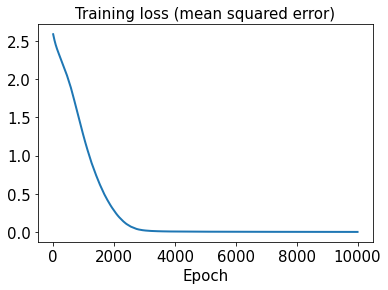

In [34]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

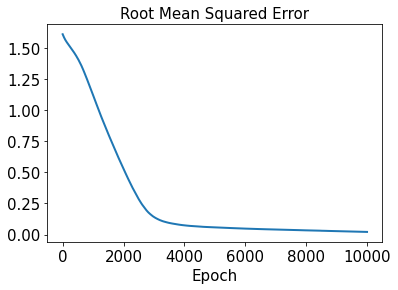

In [35]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [36]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [37]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [38]:
error_train_abs2 = np.abs(decoded_sensor_train2 - x_train2)

In [39]:
error_test_abs2 = np.abs(decoded_sensor_test2 - x_test2)

In [40]:
error_train_abs2

array([[[4.18548775e-02],
        [1.07185555e-02],
        [5.42001724e-04],
        [6.98094368e-04],
        [1.44524288e-02],
        [3.07278633e-04],
        [3.03630829e-04],
        [2.38351822e-04],
        [1.45230722e-02],
        [1.03240013e-04],
        [7.90458202e-03],
        [1.37533951e-02],
        [1.98726654e-04],
        [2.11052895e-04],
        [1.90100479e-02],
        [2.09677505e-02]],

       [[8.24255872e-02],
        [2.04942036e-02],
        [1.48180246e-03],
        [2.08036423e-03],
        [2.79833484e-02],
        [1.03208542e-03],
        [1.21025562e-03],
        [5.42993546e-04],
        [2.80817437e-02],
        [4.68921661e-05],
        [1.47125673e-02],
        [2.64163685e-02],
        [3.80082130e-04],
        [6.48450851e-05],
        [3.58088684e-02],
        [4.10337639e-02]],

       [[2.56444883e-02],
        [6.64748669e-03],
        [2.78024673e-04],
        [3.35769653e-04],
        [8.91735077e-03],
        [1.32589340e-04],
        

In [41]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.013864422455050757


In [42]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.014208070145267464


In [43]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8236 - rmse: 1.9554
Epoch 2/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8144 - rmse: 1.9530
Epoch 3/10000
2/2 [==============================] - 0s 17ms/step - loss: 3.8054 - rmse: 1.9507
Epoch 4/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7964 - rmse: 1.9484
Epoch 5/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7875 - rmse: 1.9462
Epoch 6/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7785 - rmse: 1.9438
Epoch 7/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.7696 - rmse: 1.9415
Epoch 8/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7606 - rmse: 1.9392
Epoch 9/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7518 - rmse: 1.9369
Epoch 10/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7430 - rmse: 1.9347
Epoch 11/10000
2/2 [======================

2/2 [==============================] - 0s 3ms/step - loss: 3.1679 - rmse: 1.7799
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1616 - rmse: 1.7781
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1552 - rmse: 1.7763
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1489 - rmse: 1.7745
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1425 - rmse: 1.7727
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1361 - rmse: 1.7709
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1297 - rmse: 1.7691
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1232 - rmse: 1.7673
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1168 - rmse: 1.7654
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1105 - rmse: 1.7637
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 2.6965 - rmse: 1.6421
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6918 - rmse: 1.6407
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6871 - rmse: 1.6393
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6825 - rmse: 1.6378
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6780 - rmse: 1.6365
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6734 - rmse: 1.6350
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6689 - rmse: 1.6337
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6643 - rmse: 1.6323
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6597 - rmse: 1.6308
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6549 - rmse: 1.6294
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 2.3410 - rmse: 1.5300
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3372 - rmse: 1.5288
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3335 - rmse: 1.5276
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3298 - rmse: 1.5264
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3260 - rmse: 1.5251
Epoch 259/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3224 - rmse: 1.5239
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3189 - rmse: 1.5228
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3154 - rmse: 1.5217
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3120 - rmse: 1.5205
Epoch 263/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3085 - rmse: 1.5194
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 2.0646 - rmse: 1.4369
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0616 - rmse: 1.4358
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0586 - rmse: 1.4348
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0557 - rmse: 1.4338
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0527 - rmse: 1.4327
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0498 - rmse: 1.4317
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0468 - rmse: 1.4307
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0439 - rmse: 1.4296
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0410 - rmse: 1.4286
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0381 - rmse: 1.4276
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.8438 - rmse: 1.3579
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8415 - rmse: 1.3570
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8392 - rmse: 1.3562
Epoch 425/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8368 - rmse: 1.3553
Epoch 426/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8344 - rmse: 1.3544
Epoch 427/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8321 - rmse: 1.3536
Epoch 428/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8298 - rmse: 1.3527
Epoch 429/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8275 - rmse: 1.3519
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8252 - rmse: 1.3510
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8229 - rmse: 1.3501
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.6646 - rmse: 1.2902
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6627 - rmse: 1.2895
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6609 - rmse: 1.2887
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6590 - rmse: 1.2880
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6572 - rmse: 1.2873
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6554 - rmse: 1.2866
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6536 - rmse: 1.2859
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6517 - rmse: 1.2852
Epoch 514/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6498 - rmse: 1.2844
Epoch 515/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6480 - rmse: 1.2837
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 1.5194 - rmse: 1.2326
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5178 - rmse: 1.2320
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5162 - rmse: 1.2313
Epoch 593/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5146 - rmse: 1.2307
Epoch 594/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5129 - rmse: 1.2300
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5113 - rmse: 1.2293
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5097 - rmse: 1.2287
Epoch 597/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5081 - rmse: 1.2281
Epoch 598/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5066 - rmse: 1.2274
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5050 - rmse: 1.2268
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.3968 - rmse: 1.1819
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3954 - rmse: 1.1813
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3940 - rmse: 1.1807
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3927 - rmse: 1.1801
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3913 - rmse: 1.1795
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3899 - rmse: 1.1789
Epoch 680/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3885 - rmse: 1.1784
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3871 - rmse: 1.1778
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3858 - rmse: 1.1772
Epoch 683/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3844 - rmse: 1.1766
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2918 - rmse: 1.1366
Epoch 759/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2906 - rmse: 1.1361
Epoch 760/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2895 - rmse: 1.1356
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2883 - rmse: 1.1350
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2872 - rmse: 1.1345
Epoch 763/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2861 - rmse: 1.1340
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2849 - rmse: 1.1335
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2838 - rmse: 1.1330
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2827 - rmse: 1.1325
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2815 - rmse: 1.1320
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2000 - rmse: 1.0954
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1990 - rmse: 1.0950
Epoch 844/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1980 - rmse: 1.0945
Epoch 845/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1970 - rmse: 1.0941
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1959 - rmse: 1.0936
Epoch 847/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1949 - rmse: 1.0931
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1939 - rmse: 1.0927
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1929 - rmse: 1.0922
Epoch 850/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1919 - rmse: 1.0917
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1909 - rmse: 1.0913
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.1199 - rmse: 1.0582
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1190 - rmse: 1.0578
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1181 - rmse: 1.0574
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1172 - rmse: 1.0570
Epoch 930/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1163 - rmse: 1.0566
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1155 - rmse: 1.0562
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1146 - rmse: 1.0557
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1137 - rmse: 1.0553
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1128 - rmse: 1.0549
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1120 - rmse: 1.0545
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0496 - rmse: 1.0245
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0489 - rmse: 1.0241
Epoch 1012/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0481 - rmse: 1.0238
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0473 - rmse: 1.0234
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0465 - rmse: 1.0230
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0457 - rmse: 1.0226
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0450 - rmse: 1.0222
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0442 - rmse: 1.0219
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0434 - rmse: 1.0215
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0426 - rmse: 1.0211
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.9881 - rmse: 0.9940
Epoch 1094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9874 - rmse: 0.9937
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9867 - rmse: 0.9933
Epoch 1096/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9860 - rmse: 0.9930
Epoch 1097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9853 - rmse: 0.9926
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9846 - rmse: 0.9923
Epoch 1099/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9839 - rmse: 0.9919
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9832 - rmse: 0.9916
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9825 - rmse: 0.9912
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9818 - rmse: 0.9909
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.9322 - rmse: 0.9655
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9316 - rmse: 0.9652
Epoch 1178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9309 - rmse: 0.9648
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9303 - rmse: 0.9645
Epoch 1180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9296 - rmse: 0.9642
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9290 - rmse: 0.9638
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9284 - rmse: 0.9635
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9277 - rmse: 0.9632
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9271 - rmse: 0.9629
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9265 - rmse: 0.9625
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.8809 - rmse: 0.9385
Epoch 1260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8803 - rmse: 0.9382
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8797 - rmse: 0.9379
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8791 - rmse: 0.9376
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8785 - rmse: 0.9373
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8779 - rmse: 0.9369
Epoch 1265/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8773 - rmse: 0.9366
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8767 - rmse: 0.9363
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8761 - rmse: 0.9360
Epoch 1268/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8755 - rmse: 0.9357
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.8332 - rmse: 0.9128
Epoch 1343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8326 - rmse: 0.9125
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8320 - rmse: 0.9122
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8315 - rmse: 0.9119
Epoch 1346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8309 - rmse: 0.9115
Epoch 1347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8304 - rmse: 0.9112
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8298 - rmse: 0.9109
Epoch 1349/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8292 - rmse: 0.9106
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8287 - rmse: 0.9103
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8281 - rmse: 0.9100
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.7882 - rmse: 0.8878
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7877 - rmse: 0.8875
Epoch 1427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7872 - rmse: 0.8872
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7867 - rmse: 0.8870
Epoch 1429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7862 - rmse: 0.8867
Epoch 1430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7856 - rmse: 0.8864
Epoch 1431/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7851 - rmse: 0.8861
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7846 - rmse: 0.8858
Epoch 1433/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7840 - rmse: 0.8855
Epoch 1434/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7835 - rmse: 0.8852
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.7455 - rmse: 0.8634
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7450 - rmse: 0.8631
Epoch 1510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7445 - rmse: 0.8628
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7440 - rmse: 0.8625
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7435 - rmse: 0.8623
Epoch 1513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7430 - rmse: 0.8620
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7425 - rmse: 0.8617
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7420 - rmse: 0.8614
Epoch 1516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7415 - rmse: 0.8611
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7410 - rmse: 0.8608
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.7051 - rmse: 0.8397
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7046 - rmse: 0.8394
Epoch 1593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7041 - rmse: 0.8391
Epoch 1594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7036 - rmse: 0.8388
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7032 - rmse: 0.8386
Epoch 1596/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7027 - rmse: 0.8383
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7023 - rmse: 0.8380
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7018 - rmse: 0.8377
Epoch 1599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7013 - rmse: 0.8375
Epoch 1600/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7009 - rmse: 0.8372
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.6668 - rmse: 0.8166
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6664 - rmse: 0.8163
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6659 - rmse: 0.8160
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6655 - rmse: 0.8158
Epoch 1678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6650 - rmse: 0.8155
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6645 - rmse: 0.8152
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6641 - rmse: 0.8149
Epoch 1681/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6636 - rmse: 0.8146
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6632 - rmse: 0.8144
Epoch 1683/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6627 - rmse: 0.8141
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.6294 - rmse: 0.7933
Epoch 1758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6289 - rmse: 0.7930
Epoch 1759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6285 - rmse: 0.7928
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6280 - rmse: 0.7925
Epoch 1761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6276 - rmse: 0.7922
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6272 - rmse: 0.7920
Epoch 1763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6268 - rmse: 0.7917
Epoch 1764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6264 - rmse: 0.7914
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6259 - rmse: 0.7911
Epoch 1766/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6255 - rmse: 0.7909
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.5935 - rmse: 0.7704
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5930 - rmse: 0.7701
Epoch 1842/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5926 - rmse: 0.7698
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5922 - rmse: 0.7695
Epoch 1844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5918 - rmse: 0.7693
Epoch 1845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5914 - rmse: 0.7690
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5909 - rmse: 0.7687
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5905 - rmse: 0.7684
Epoch 1848/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5900 - rmse: 0.7681
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5896 - rmse: 0.7678
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.5575 - rmse: 0.7467
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5571 - rmse: 0.7464
Epoch 1925/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5567 - rmse: 0.7461
Epoch 1926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5563 - rmse: 0.7458
Epoch 1927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5558 - rmse: 0.7455
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5554 - rmse: 0.7453
Epoch 1929/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5550 - rmse: 0.7450
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5545 - rmse: 0.7447
Epoch 1931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5541 - rmse: 0.7444
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5537 - rmse: 0.7441
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.5235 - rmse: 0.7236
Epoch 2007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5231 - rmse: 0.7233
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5227 - rmse: 0.7230
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5223 - rmse: 0.7227
Epoch 2010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5219 - rmse: 0.7224
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5215 - rmse: 0.7221
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5211 - rmse: 0.7219
Epoch 2013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5207 - rmse: 0.7216
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5202 - rmse: 0.7213
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5198 - rmse: 0.7210
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.4903 - rmse: 0.7002
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4899 - rmse: 0.7000
Epoch 2091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4895 - rmse: 0.6997
Epoch 2092/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4891 - rmse: 0.6994
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4888 - rmse: 0.6991
Epoch 2094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4884 - rmse: 0.6988
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4880 - rmse: 0.6986
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4876 - rmse: 0.6983
Epoch 2097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4872 - rmse: 0.6980
Epoch 2098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4868 - rmse: 0.6977
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.4576 - rmse: 0.6765
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4572 - rmse: 0.6762
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4568 - rmse: 0.6759
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4564 - rmse: 0.6756
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4560 - rmse: 0.6753
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4556 - rmse: 0.6750
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4552 - rmse: 0.6747
Epoch 2179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4548 - rmse: 0.6744
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4544 - rmse: 0.6741
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4540 - rmse: 0.6738
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.4267 - rmse: 0.6532
Epoch 2256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4263 - rmse: 0.6529
Epoch 2257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4260 - rmse: 0.6527
Epoch 2258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4256 - rmse: 0.6524
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4253 - rmse: 0.6521
Epoch 2260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4249 - rmse: 0.6518
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4245 - rmse: 0.6515
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4241 - rmse: 0.6512
Epoch 2263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4237 - rmse: 0.6509
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4233 - rmse: 0.6506
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.3952 - rmse: 0.6286
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3948 - rmse: 0.6283
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3944 - rmse: 0.6280
Epoch 2341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3940 - rmse: 0.6277
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3936 - rmse: 0.6274
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3932 - rmse: 0.6271
Epoch 2344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3928 - rmse: 0.6267
Epoch 2345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3924 - rmse: 0.6264
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3920 - rmse: 0.6261
Epoch 2347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3917 - rmse: 0.6258
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3657 - rmse: 0.6047
Epoch 2422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3653 - rmse: 0.6044
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3650 - rmse: 0.6041
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3646 - rmse: 0.6038
Epoch 2425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3643 - rmse: 0.6035
Epoch 2426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3639 - rmse: 0.6032
Epoch 2427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3635 - rmse: 0.6029
Epoch 2428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3631 - rmse: 0.6026
Epoch 2429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3628 - rmse: 0.6023
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3624 - rmse: 0.6020
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3371 - rmse: 0.5806
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3367 - rmse: 0.5802
Epoch 2506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3363 - rmse: 0.5799
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3359 - rmse: 0.5796
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3356 - rmse: 0.5793
Epoch 2509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3353 - rmse: 0.5790
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3349 - rmse: 0.5787
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3346 - rmse: 0.5784
Epoch 2512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3342 - rmse: 0.5781
Epoch 2513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3339 - rmse: 0.5778
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.3101 - rmse: 0.5568
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3098 - rmse: 0.5566
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3095 - rmse: 0.5563
Epoch 2590/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3092 - rmse: 0.5561
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3089 - rmse: 0.5558
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3086 - rmse: 0.5555
Epoch 2593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3083 - rmse: 0.5553
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3080 - rmse: 0.5550
Epoch 2595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3077 - rmse: 0.5547
Epoch 2596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3074 - rmse: 0.5545
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2859 - rmse: 0.5347
Epoch 2671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2857 - rmse: 0.5345
Epoch 2672/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2854 - rmse: 0.5342
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2851 - rmse: 0.5340
Epoch 2674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2849 - rmse: 0.5337
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2846 - rmse: 0.5335
Epoch 2676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2843 - rmse: 0.5332
Epoch 2677/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2840 - rmse: 0.5330
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2837 - rmse: 0.5327
Epoch 2679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2834 - rmse: 0.5324
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2633 - rmse: 0.5131
Epoch 2754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2630 - rmse: 0.5129
Epoch 2755/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2628 - rmse: 0.5126
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2625 - rmse: 0.5123
Epoch 2757/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2622 - rmse: 0.5120
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2619 - rmse: 0.5118
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2617 - rmse: 0.5115
Epoch 2760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2614 - rmse: 0.5113
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2611 - rmse: 0.5110
Epoch 2762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2608 - rmse: 0.5107
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2417 - rmse: 0.4916
Epoch 2837/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2415 - rmse: 0.4914
Epoch 2838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2412 - rmse: 0.4912
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2410 - rmse: 0.4909
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2407 - rmse: 0.4907
Epoch 2841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2405 - rmse: 0.4904
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2402 - rmse: 0.4901
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2400 - rmse: 0.4899
Epoch 2844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2397 - rmse: 0.4896
Epoch 2845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2395 - rmse: 0.4894
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.2221 - rmse: 0.4713
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2219 - rmse: 0.4710
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2217 - rmse: 0.4708
Epoch 2922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2214 - rmse: 0.4706
Epoch 2923/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2212 - rmse: 0.4704
Epoch 2924/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2210 - rmse: 0.4702
Epoch 2925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2209 - rmse: 0.4699
Epoch 2926/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2207 - rmse: 0.4698
Epoch 2927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2205 - rmse: 0.4696
Epoch 2928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2203 - rmse: 0.4694
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2039 - rmse: 0.4516
Epoch 3003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2037 - rmse: 0.4514
Epoch 3004/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2035 - rmse: 0.4511
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2033 - rmse: 0.4509
Epoch 3006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2032 - rmse: 0.4508
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2030 - rmse: 0.4506
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2029 - rmse: 0.4504
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2027 - rmse: 0.4502
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2026 - rmse: 0.4501
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2024 - rmse: 0.4499
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.1873 - rmse: 0.4327
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1871 - rmse: 0.4325
Epoch 3087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1869 - rmse: 0.4323
Epoch 3088/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1867 - rmse: 0.4321
Epoch 3089/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1865 - rmse: 0.4319
Epoch 3090/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1863 - rmse: 0.4316
Epoch 3091/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1861 - rmse: 0.4314
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1859 - rmse: 0.4311
Epoch 3093/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1857 - rmse: 0.4309
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1855 - rmse: 0.4307
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.1721 - rmse: 0.4149
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1720 - rmse: 0.4147
Epoch 3170/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1718 - rmse: 0.4145
Epoch 3171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1717 - rmse: 0.4143
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1715 - rmse: 0.4141
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1713 - rmse: 0.4139
Epoch 3174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1712 - rmse: 0.4137
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1710 - rmse: 0.4135
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1708 - rmse: 0.4133
Epoch 3177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1707 - rmse: 0.4131
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1589 - rmse: 0.3987
Epoch 3252/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1588 - rmse: 0.3985
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1587 - rmse: 0.3983
Epoch 3254/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1585 - rmse: 0.3981
Epoch 3255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1583 - rmse: 0.3979
Epoch 3256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1582 - rmse: 0.3977
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1580 - rmse: 0.3975
Epoch 3258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1578 - rmse: 0.3973
Epoch 3259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1577 - rmse: 0.3971
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1575 - rmse: 0.3969
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1465 - rmse: 0.3828
Epoch 3335/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1464 - rmse: 0.3827
Epoch 3336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1463 - rmse: 0.3825
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1462 - rmse: 0.3824
Epoch 3338/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1461 - rmse: 0.3822
Epoch 3339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1460 - rmse: 0.3821
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1459 - rmse: 0.3819
Epoch 3341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1457 - rmse: 0.3818
Epoch 3342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1456 - rmse: 0.3816
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1455 - rmse: 0.3814
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.1367 - rmse: 0.3697
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1365 - rmse: 0.3695
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1363 - rmse: 0.3693
Epoch 3420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1362 - rmse: 0.3691
Epoch 3421/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1361 - rmse: 0.3689
Epoch 3422/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1360 - rmse: 0.3687
Epoch 3423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1358 - rmse: 0.3685
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1357 - rmse: 0.3683
Epoch 3425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1355 - rmse: 0.3681
Epoch 3426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1354 - rmse: 0.3679
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1260 - rmse: 0.3550
Epoch 3501/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1259 - rmse: 0.3548
Epoch 3502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1257 - rmse: 0.3546
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1256 - rmse: 0.3543
Epoch 3504/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1254 - rmse: 0.3541
Epoch 3505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1253 - rmse: 0.3540
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1252 - rmse: 0.3538
Epoch 3507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1250 - rmse: 0.3536
Epoch 3508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1249 - rmse: 0.3534
Epoch 3509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1248 - rmse: 0.3533
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1166 - rmse: 0.3415
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1165 - rmse: 0.3414
Epoch 3585/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1164 - rmse: 0.3412
Epoch 3586/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1164 - rmse: 0.3411
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1163 - rmse: 0.3410
Epoch 3588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1161 - rmse: 0.3408
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1160 - rmse: 0.3406
Epoch 3590/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1159 - rmse: 0.3404
Epoch 3591/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1158 - rmse: 0.3403
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1157 - rmse: 0.3401
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1083 - rmse: 0.3290
Epoch 3667/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1082 - rmse: 0.3289
Epoch 3668/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1081 - rmse: 0.3287
Epoch 3669/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1080 - rmse: 0.3286
Epoch 3670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1079 - rmse: 0.3284
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1078 - rmse: 0.3283
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1077 - rmse: 0.3282
Epoch 3673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1076 - rmse: 0.3280
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1075 - rmse: 0.3279
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1074 - rmse: 0.3277
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1013 - rmse: 0.3183
Epoch 3750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1012 - rmse: 0.3181
Epoch 3751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1011 - rmse: 0.3180
Epoch 3752/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1010 - rmse: 0.3178
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1009 - rmse: 0.3177
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1008 - rmse: 0.3176
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1008 - rmse: 0.3174
Epoch 3756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1007 - rmse: 0.3173
Epoch 3757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1006 - rmse: 0.3172
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1006 - rmse: 0.3171
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0940 - rmse: 0.3067
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0940 - rmse: 0.3065
Epoch 3834/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0939 - rmse: 0.3064
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0938 - rmse: 0.3063
Epoch 3836/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0937 - rmse: 0.3061
Epoch 3837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0936 - rmse: 0.3060
Epoch 3838/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0936 - rmse: 0.3059
Epoch 3839/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0935 - rmse: 0.3058
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0934 - rmse: 0.3057
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0934 - rmse: 0.3056
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0881 - rmse: 0.2968
Epoch 3916/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0880 - rmse: 0.2966
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0879 - rmse: 0.2965
Epoch 3918/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0878 - rmse: 0.2964
Epoch 3919/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0878 - rmse: 0.2962
Epoch 3920/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0877 - rmse: 0.2961
Epoch 3921/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0876 - rmse: 0.2960
Epoch 3922/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0876 - rmse: 0.2959
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0875 - rmse: 0.2958
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0875 - rmse: 0.2957
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0820 - rmse: 0.2864
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0820 - rmse: 0.2863
Epoch 4000/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0819 - rmse: 0.2862
Epoch 4001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0818 - rmse: 0.2861
Epoch 4002/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0818 - rmse: 0.2859
Epoch 4003/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0817 - rmse: 0.2858
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0816 - rmse: 0.2857
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0816 - rmse: 0.2856
Epoch 4006/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0815 - rmse: 0.2855
Epoch 4007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0815 - rmse: 0.2854
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0764 - rmse: 0.2765
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0764 - rmse: 0.2764
Epoch 4083/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0763 - rmse: 0.2762
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0762 - rmse: 0.2760
Epoch 4085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0761 - rmse: 0.2758
Epoch 4086/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0760 - rmse: 0.2757
Epoch 4087/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0759 - rmse: 0.2755
Epoch 4088/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0758 - rmse: 0.2753
Epoch 4089/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0757 - rmse: 0.2752
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0757 - rmse: 0.2751
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0708 - rmse: 0.2661
Epoch 4165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0707 - rmse: 0.2660
Epoch 4166/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0707 - rmse: 0.2659
Epoch 4167/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0707 - rmse: 0.2658
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2657
Epoch 4169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0706 - rmse: 0.2656
Epoch 4170/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0705 - rmse: 0.2656
Epoch 4171/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0705 - rmse: 0.2655
Epoch 4172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0704 - rmse: 0.2654
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0704 - rmse: 0.2653
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0665 - rmse: 0.2579
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0664 - rmse: 0.2577
Epoch 4249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0663 - rmse: 0.2576
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0663 - rmse: 0.2574
Epoch 4251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0662 - rmse: 0.2573
Epoch 4252/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0661 - rmse: 0.2571
Epoch 4253/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0660 - rmse: 0.2569
Epoch 4254/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0659 - rmse: 0.2568
Epoch 4255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0659 - rmse: 0.2566
Epoch 4256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0658 - rmse: 0.2565
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0607 - rmse: 0.2463
Epoch 4331/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0606 - rmse: 0.2462
Epoch 4332/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0606 - rmse: 0.2461
Epoch 4333/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0605 - rmse: 0.2460
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0605 - rmse: 0.2459
Epoch 4335/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0604 - rmse: 0.2458
Epoch 4336/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0604 - rmse: 0.2457
Epoch 4337/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0603 - rmse: 0.2456
Epoch 4338/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0603 - rmse: 0.2455
Epoch 4339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0602 - rmse: 0.2454
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0564 - rmse: 0.2375
Epoch 4414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0564 - rmse: 0.2374
Epoch 4415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0563 - rmse: 0.2373
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0563 - rmse: 0.2372
Epoch 4417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0562 - rmse: 0.2371
Epoch 4418/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0562 - rmse: 0.2371
Epoch 4419/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0562 - rmse: 0.2370
Epoch 4420/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0561 - rmse: 0.2369
Epoch 4421/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0561 - rmse: 0.2369
Epoch 4422/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0561 - rmse: 0.2368
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0518 - rmse: 0.2277
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0518 - rmse: 0.2275
Epoch 4498/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0517 - rmse: 0.2274
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0517 - rmse: 0.2273
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0516 - rmse: 0.2272
Epoch 4501/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0516 - rmse: 0.2271
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0515 - rmse: 0.2270
Epoch 4503/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0515 - rmse: 0.2269
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0514 - rmse: 0.2268
Epoch 4505/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0514 - rmse: 0.2267
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0479 - rmse: 0.2188
Epoch 4580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0478 - rmse: 0.2187
Epoch 4581/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0478 - rmse: 0.2186
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0478 - rmse: 0.2185
Epoch 4583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0477 - rmse: 0.2184
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0477 - rmse: 0.2183
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0476 - rmse: 0.2183
Epoch 4586/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0476 - rmse: 0.2182
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0476 - rmse: 0.2181
Epoch 4588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0475 - rmse: 0.2180
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0443 - rmse: 0.2105
Epoch 4663/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0442 - rmse: 0.2103
Epoch 4664/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0442 - rmse: 0.2102
Epoch 4665/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0441 - rmse: 0.2100
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.2099
Epoch 4667/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0440 - rmse: 0.2098
Epoch 4668/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0440 - rmse: 0.2097
Epoch 4669/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0439 - rmse: 0.2096
Epoch 4670/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0439 - rmse: 0.2095
Epoch 4671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0438 - rmse: 0.2093
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0410 - rmse: 0.2024
Epoch 4746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0409 - rmse: 0.2023
Epoch 4747/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0409 - rmse: 0.2022
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.2021
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.2020
Epoch 4750/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0408 - rmse: 0.2019
Epoch 4751/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0407 - rmse: 0.2018
Epoch 4752/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0407 - rmse: 0.2017
Epoch 4753/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0406 - rmse: 0.2016
Epoch 4754/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0406 - rmse: 0.2015
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0375 - rmse: 0.1935
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0374 - rmse: 0.1934
Epoch 4830/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0374 - rmse: 0.1933
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1932
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1931
Epoch 4833/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0372 - rmse: 0.1930
Epoch 4834/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0372 - rmse: 0.1929
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0372 - rmse: 0.1928
Epoch 4836/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0371 - rmse: 0.1927
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0371 - rmse: 0.1926
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0339 - rmse: 0.1842
Epoch 4912/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0339 - rmse: 0.1841
Epoch 4913/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0338 - rmse: 0.1839
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0338 - rmse: 0.1838
Epoch 4915/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0337 - rmse: 0.1837
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0337 - rmse: 0.1835
Epoch 4917/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0336 - rmse: 0.1834
Epoch 4918/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0336 - rmse: 0.1833
Epoch 4919/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0335 - rmse: 0.1832
Epoch 4920/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0335 - rmse: 0.1830
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0308 - rmse: 0.1756
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0308 - rmse: 0.1755
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0308 - rmse: 0.1754
Epoch 4997/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0307 - rmse: 0.1752
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0307 - rmse: 0.1751
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0306 - rmse: 0.1750
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0306 - rmse: 0.1749
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0305 - rmse: 0.1747
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0305 - rmse: 0.1746
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0304 - rmse: 0.1745
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0278 - rmse: 0.1668
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0278 - rmse: 0.1667
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0278 - rmse: 0.1666
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0277 - rmse: 0.1665
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0277 - rmse: 0.1664
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0277 - rmse: 0.1664
Epoch 5083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0276 - rmse: 0.1662
Epoch 5084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0276 - rmse: 0.1661
Epoch 5085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0276 - rmse: 0.1660
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0275 - rmse: 0.1659
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0249 - rmse: 0.1577
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0248 - rmse: 0.1576
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0248 - rmse: 0.1574
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0248 - rmse: 0.1573
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.1573
Epoch 5165/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.1572
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.1571
Epoch 5167/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0246 - rmse: 0.1570
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1569
Epoch 5169/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0246 - rmse: 0.1568
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0222 - rmse: 0.1489
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1489
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1487
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1486
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1485
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1485
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1484
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1483
Epoch 5251/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0220 - rmse: 0.1482
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0197 - rmse: 0.1404
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0197 - rmse: 0.1403
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0197 - rmse: 0.1402
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1401
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 5331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1398
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 5335/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 5411/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 5494/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1258
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 5576/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0143 - rmse: 0.1198
Epoch 5577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1197
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 5580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0143 - rmse: 0.1195
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1194
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 5584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1132
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1130
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1129
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1129
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1128
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1079
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1078
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 5747/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0116 - rmse: 0.1075
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1074
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1074
Epoch 5750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1024
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1022
Epoch 5827/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0104 - rmse: 0.1022
Epoch 5828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1021
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 5830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1018
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1017
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0971
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0971
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 5910/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 5912/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0967
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0966
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0921
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 5992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0919
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 6079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 6081/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 6157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 6158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 6160/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 6162/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0822
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0778
Epoch 6246/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0738
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0738
Epoch 6326/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 6328/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 6330/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 6406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 6410/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 6413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 6414/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0048 - rmse: 0.0696
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6492/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 6496/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 6573/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 6659/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6661/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0604
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6827/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 6905/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 6911/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 6988/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7072/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7074/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 7153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 7161/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7237/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 7238/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 7240/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0430
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0430
Epoch 7243/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 7244/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 7319/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 7320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 7321/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 7322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 7323/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 7325/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 7326/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 7327/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7403/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7404/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7405/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7406/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7407/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7408/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7409/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7410/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 7485/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 7486/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 7487/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7488/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7490/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7568/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7569/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7570/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7571/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7572/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7574/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7575/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7576/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7651/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7652/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7653/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7654/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7655/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7656/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7657/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7658/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 7734/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7735/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 7736/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7737/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7738/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7739/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7740/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7741/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7742/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 9.9907e-04 - rmse: 0.0316
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9705e-04 - rmse: 0.0316
Epoch 7818/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9469e-04 - rmse: 0.0315
Epoch 7819/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9245e-04 - rmse: 0.0315
Epoch 7820/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9130e-04 - rmse: 0.0315
Epoch 7821/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9012e-04 - rmse: 0.0315
Epoch 7822/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8946e-04 - rmse: 0.0315
Epoch 7823/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8987e-04 - rmse: 0.0315
Epoch 7824/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8965e-04 - rmse: 0.0315
Epoch 7825/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8897e-04 - rmse: 0.03

2/2 [==============================] - 0s 3ms/step - loss: 9.2254e-04 - rmse: 0.0304
Epoch 7897/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2373e-04 - rmse: 0.0304
Epoch 7898/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2365e-04 - rmse: 0.0304
Epoch 7899/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2431e-04 - rmse: 0.0304
Epoch 7900/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2425e-04 - rmse: 0.0304
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2389e-04 - rmse: 0.0304
Epoch 7902/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2409e-04 - rmse: 0.0304
Epoch 7903/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2533e-04 - rmse: 0.0304
Epoch 7904/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2537e-04 - rmse: 0.0304
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2494e-04 - rmse: 0.03

2/2 [==============================] - 0s 3ms/step - loss: 8.5803e-04 - rmse: 0.0293
Epoch 7977/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5667e-04 - rmse: 0.0293
Epoch 7978/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5490e-04 - rmse: 0.0292
Epoch 7979/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5382e-04 - rmse: 0.0292
Epoch 7980/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5289e-04 - rmse: 0.0292
Epoch 7981/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5203e-04 - rmse: 0.0292
Epoch 7982/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5095e-04 - rmse: 0.0292
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4961e-04 - rmse: 0.0291
Epoch 7984/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4878e-04 - rmse: 0.0291
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4762e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 7.9529e-04 - rmse: 0.0282
Epoch 8057/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9380e-04 - rmse: 0.0282
Epoch 8058/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9282e-04 - rmse: 0.0282
Epoch 8059/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9135e-04 - rmse: 0.0281
Epoch 8060/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9028e-04 - rmse: 0.0281
Epoch 8061/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8912e-04 - rmse: 0.0281
Epoch 8062/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8823e-04 - rmse: 0.0281
Epoch 8063/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8699e-04 - rmse: 0.0281
Epoch 8064/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8614e-04 - rmse: 0.0280
Epoch 8065/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8520e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 7.3645e-04 - rmse: 0.0271
Epoch 8137/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3540e-04 - rmse: 0.0271
Epoch 8138/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3409e-04 - rmse: 0.0271
Epoch 8139/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3304e-04 - rmse: 0.0271
Epoch 8140/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3206e-04 - rmse: 0.0271
Epoch 8141/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3081e-04 - rmse: 0.0270
Epoch 8142/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.3035e-04 - rmse: 0.0270
Epoch 8143/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2965e-04 - rmse: 0.0270
Epoch 8144/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2872e-04 - rmse: 0.0270
Epoch 8145/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2747e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 6.8942e-04 - rmse: 0.0263
Epoch 8217/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8953e-04 - rmse: 0.0263
Epoch 8218/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9018e-04 - rmse: 0.0263
Epoch 8219/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8982e-04 - rmse: 0.0263
Epoch 8220/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8840e-04 - rmse: 0.0262
Epoch 8221/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8681e-04 - rmse: 0.0262
Epoch 8222/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8528e-04 - rmse: 0.0262
Epoch 8223/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8449e-04 - rmse: 0.0262
Epoch 8224/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8369e-04 - rmse: 0.0261
Epoch 8225/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8318e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 6.4969e-04 - rmse: 0.0255
Epoch 8297/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4749e-04 - rmse: 0.0254
Epoch 8298/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4627e-04 - rmse: 0.0254
Epoch 8299/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4545e-04 - rmse: 0.0254
Epoch 8300/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4417e-04 - rmse: 0.0254
Epoch 8301/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4339e-04 - rmse: 0.0254
Epoch 8302/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4325e-04 - rmse: 0.0254
Epoch 8303/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4274e-04 - rmse: 0.0254
Epoch 8304/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4273e-04 - rmse: 0.0254
Epoch 8305/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4536e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 6.1353e-04 - rmse: 0.0248
Epoch 8377/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1255e-04 - rmse: 0.0247
Epoch 8378/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1156e-04 - rmse: 0.0247
Epoch 8379/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1042e-04 - rmse: 0.0247
Epoch 8380/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0958e-04 - rmse: 0.0247
Epoch 8381/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0923e-04 - rmse: 0.0247
Epoch 8382/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0881e-04 - rmse: 0.0247
Epoch 8383/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0845e-04 - rmse: 0.0247
Epoch 8384/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0841e-04 - rmse: 0.0247
Epoch 8385/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0846e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 5.7365e-04 - rmse: 0.0240
Epoch 8457/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7307e-04 - rmse: 0.0239
Epoch 8458/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7219e-04 - rmse: 0.0239
Epoch 8459/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7318e-04 - rmse: 0.0239
Epoch 8460/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7364e-04 - rmse: 0.0240
Epoch 8461/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7436e-04 - rmse: 0.0240
Epoch 8462/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7457e-04 - rmse: 0.0240
Epoch 8463/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7480e-04 - rmse: 0.0240
Epoch 8464/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7752e-04 - rmse: 0.0240
Epoch 8465/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7870e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 5.4373e-04 - rmse: 0.0233
Epoch 8537/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4381e-04 - rmse: 0.0233
Epoch 8538/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4349e-04 - rmse: 0.0233
Epoch 8539/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4314e-04 - rmse: 0.0233
Epoch 8540/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4277e-04 - rmse: 0.0233
Epoch 8541/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4208e-04 - rmse: 0.0233
Epoch 8542/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4121e-04 - rmse: 0.0233
Epoch 8543/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4041e-04 - rmse: 0.0232
Epoch 8544/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3951e-04 - rmse: 0.0232
Epoch 8545/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3898e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 5.2953e-04 - rmse: 0.0230
Epoch 8617/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3002e-04 - rmse: 0.0230
Epoch 8618/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2886e-04 - rmse: 0.0230
Epoch 8619/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2621e-04 - rmse: 0.0229
Epoch 8620/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2436e-04 - rmse: 0.0229
Epoch 8621/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2274e-04 - rmse: 0.0229
Epoch 8622/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2140e-04 - rmse: 0.0228
Epoch 8623/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1976e-04 - rmse: 0.0228
Epoch 8624/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1797e-04 - rmse: 0.0228
Epoch 8625/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1677e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 4.8482e-04 - rmse: 0.0220
Epoch 8697/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8431e-04 - rmse: 0.0220
Epoch 8698/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8419e-04 - rmse: 0.0220
Epoch 8699/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8402e-04 - rmse: 0.0220
Epoch 8700/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8462e-04 - rmse: 0.0220
Epoch 8701/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8549e-04 - rmse: 0.0220
Epoch 8702/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8640e-04 - rmse: 0.0221
Epoch 8703/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8700e-04 - rmse: 0.0221
Epoch 8704/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8696e-04 - rmse: 0.0221
Epoch 8705/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8627e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.6313e-04 - rmse: 0.0215
Epoch 8777/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6406e-04 - rmse: 0.0215
Epoch 8778/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6562e-04 - rmse: 0.0216
Epoch 8779/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6660e-04 - rmse: 0.0216
Epoch 8780/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6655e-04 - rmse: 0.0216
Epoch 8781/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6551e-04 - rmse: 0.0216
Epoch 8782/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6411e-04 - rmse: 0.0215
Epoch 8783/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6312e-04 - rmse: 0.0215
Epoch 8784/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6218e-04 - rmse: 0.0215
Epoch 8785/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6149e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.4442e-04 - rmse: 0.0211
Epoch 8857/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4412e-04 - rmse: 0.0211
Epoch 8858/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4354e-04 - rmse: 0.0211
Epoch 8859/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4326e-04 - rmse: 0.0211
Epoch 8860/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4380e-04 - rmse: 0.0211
Epoch 8861/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4429e-04 - rmse: 0.0211
Epoch 8862/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4642e-04 - rmse: 0.0211
Epoch 8863/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4741e-04 - rmse: 0.0212
Epoch 8864/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4800e-04 - rmse: 0.0212
Epoch 8865/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4909e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.3361e-04 - rmse: 0.0208
Epoch 8937/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3297e-04 - rmse: 0.0208
Epoch 8938/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3202e-04 - rmse: 0.0208
Epoch 8939/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3307e-04 - rmse: 0.0208
Epoch 8940/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3447e-04 - rmse: 0.0208
Epoch 8941/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3438e-04 - rmse: 0.0208
Epoch 8942/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3442e-04 - rmse: 0.0208
Epoch 8943/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3433e-04 - rmse: 0.0208
Epoch 8944/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3322e-04 - rmse: 0.0208
Epoch 8945/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3193e-04 - rmse: 0.02

2/2 [==============================] - 0s 9ms/step - loss: 4.1874e-04 - rmse: 0.0205
Epoch 9017/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1951e-04 - rmse: 0.0205
Epoch 9018/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1973e-04 - rmse: 0.0205
Epoch 9019/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2018e-04 - rmse: 0.0205
Epoch 9020/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2109e-04 - rmse: 0.0205
Epoch 9021/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2109e-04 - rmse: 0.0205
Epoch 9022/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2102e-04 - rmse: 0.0205
Epoch 9023/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2134e-04 - rmse: 0.0205
Epoch 9024/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2162e-04 - rmse: 0.0205
Epoch 9025/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2352e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 4.0465e-04 - rmse: 0.0201
Epoch 9097/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0338e-04 - rmse: 0.0201
Epoch 9098/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0273e-04 - rmse: 0.0201
Epoch 9099/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0232e-04 - rmse: 0.0201
Epoch 9100/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0183e-04 - rmse: 0.0200
Epoch 9101/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0152e-04 - rmse: 0.0200
Epoch 9102/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0118e-04 - rmse: 0.0200
Epoch 9103/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0146e-04 - rmse: 0.0200
Epoch 9104/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0135e-04 - rmse: 0.0200
Epoch 9105/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0103e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 3.9386e-04 - rmse: 0.0198
Epoch 9177/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9507e-04 - rmse: 0.0199
Epoch 9178/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9396e-04 - rmse: 0.0198
Epoch 9179/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9191e-04 - rmse: 0.0198
Epoch 9180/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8993e-04 - rmse: 0.0197
Epoch 9181/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8912e-04 - rmse: 0.0197
Epoch 9182/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8803e-04 - rmse: 0.0197
Epoch 9183/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8778e-04 - rmse: 0.0197
Epoch 9184/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8934e-04 - rmse: 0.0197
Epoch 9185/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9099e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 3.8404e-04 - rmse: 0.0196
Epoch 9257/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8289e-04 - rmse: 0.0196
Epoch 9258/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8139e-04 - rmse: 0.0195
Epoch 9259/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8010e-04 - rmse: 0.0195
Epoch 9260/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7880e-04 - rmse: 0.0195
Epoch 9261/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7794e-04 - rmse: 0.0194
Epoch 9262/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7770e-04 - rmse: 0.0194
Epoch 9263/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7717e-04 - rmse: 0.0194
Epoch 9264/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7724e-04 - rmse: 0.0194
Epoch 9265/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7867e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 3.7085e-04 - rmse: 0.0193
Epoch 9337/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7088e-04 - rmse: 0.0193
Epoch 9338/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7109e-04 - rmse: 0.0193
Epoch 9339/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7131e-04 - rmse: 0.0193
Epoch 9340/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7110e-04 - rmse: 0.0193
Epoch 9341/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7150e-04 - rmse: 0.0193
Epoch 9342/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7155e-04 - rmse: 0.0193
Epoch 9343/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7175e-04 - rmse: 0.0193
Epoch 9344/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7209e-04 - rmse: 0.0193
Epoch 9345/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7210e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 3.6976e-04 - rmse: 0.0192
Epoch 9417/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7047e-04 - rmse: 0.0192
Epoch 9418/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6988e-04 - rmse: 0.0192
Epoch 9419/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6846e-04 - rmse: 0.0192
Epoch 9420/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6694e-04 - rmse: 0.0192
Epoch 9421/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6604e-04 - rmse: 0.0191
Epoch 9422/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6532e-04 - rmse: 0.0191
Epoch 9423/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6499e-04 - rmse: 0.0191
Epoch 9424/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6477e-04 - rmse: 0.0191
Epoch 9425/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6454e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 3.6410e-04 - rmse: 0.0191
Epoch 9497/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6142e-04 - rmse: 0.0190
Epoch 9498/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6054e-04 - rmse: 0.0190
Epoch 9499/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6257e-04 - rmse: 0.0190
Epoch 9500/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6446e-04 - rmse: 0.0191
Epoch 9501/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6446e-04 - rmse: 0.0191
Epoch 9502/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6410e-04 - rmse: 0.0191
Epoch 9503/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6430e-04 - rmse: 0.0191
Epoch 9504/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6576e-04 - rmse: 0.0191
Epoch 9505/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6543e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 3.5439e-04 - rmse: 0.0188
Epoch 9577/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5491e-04 - rmse: 0.0188
Epoch 9578/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5495e-04 - rmse: 0.0188
Epoch 9579/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5537e-04 - rmse: 0.0189
Epoch 9580/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5533e-04 - rmse: 0.0189
Epoch 9581/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5517e-04 - rmse: 0.0188
Epoch 9582/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5499e-04 - rmse: 0.0188
Epoch 9583/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5497e-04 - rmse: 0.0188
Epoch 9584/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5466e-04 - rmse: 0.0188
Epoch 9585/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5450e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 3.5863e-04 - rmse: 0.0189
Epoch 9657/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5804e-04 - rmse: 0.0189
Epoch 9658/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5682e-04 - rmse: 0.0189
Epoch 9659/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5602e-04 - rmse: 0.0189
Epoch 9660/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5459e-04 - rmse: 0.0188
Epoch 9661/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5365e-04 - rmse: 0.0188
Epoch 9662/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5229e-04 - rmse: 0.0188
Epoch 9663/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5172e-04 - rmse: 0.0188
Epoch 9664/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5082e-04 - rmse: 0.0187
Epoch 9665/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5098e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 3.4538e-04 - rmse: 0.0186
Epoch 9737/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4586e-04 - rmse: 0.0186
Epoch 9738/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4913e-04 - rmse: 0.0187
Epoch 9739/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5194e-04 - rmse: 0.0188
Epoch 9740/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5598e-04 - rmse: 0.0189
Epoch 9741/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5822e-04 - rmse: 0.0189
Epoch 9742/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5851e-04 - rmse: 0.0189
Epoch 9743/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5964e-04 - rmse: 0.0190
Epoch 9744/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6086e-04 - rmse: 0.0190
Epoch 9745/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6004e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 3.4073e-04 - rmse: 0.0185
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4120e-04 - rmse: 0.0185
Epoch 9818/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4166e-04 - rmse: 0.0185
Epoch 9819/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4205e-04 - rmse: 0.0185
Epoch 9820/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4252e-04 - rmse: 0.0185
Epoch 9821/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4336e-04 - rmse: 0.0185
Epoch 9822/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4329e-04 - rmse: 0.0185
Epoch 9823/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4272e-04 - rmse: 0.0185
Epoch 9824/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4223e-04 - rmse: 0.0185
Epoch 9825/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4200e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 3.4698e-04 - rmse: 0.0186
Epoch 9897/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4939e-04 - rmse: 0.0187
Epoch 9898/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4968e-04 - rmse: 0.0187
Epoch 9899/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4819e-04 - rmse: 0.0187
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4636e-04 - rmse: 0.0186
Epoch 9901/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4553e-04 - rmse: 0.0186
Epoch 9902/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4517e-04 - rmse: 0.0186
Epoch 9903/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4571e-04 - rmse: 0.0186
Epoch 9904/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4527e-04 - rmse: 0.0186
Epoch 9905/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4424e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 3.3378e-04 - rmse: 0.0183
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3375e-04 - rmse: 0.0183
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3385e-04 - rmse: 0.0183
Epoch 9979/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3420e-04 - rmse: 0.0183
Epoch 9980/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3405e-04 - rmse: 0.0183
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3372e-04 - rmse: 0.0183
Epoch 9982/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3359e-04 - rmse: 0.0183
Epoch 9983/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3394e-04 - rmse: 0.0183
Epoch 9984/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3547e-04 - rmse: 0.0183
Epoch 9985/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3722e-04 - rmse: 0.01

In [45]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:01:40.680955


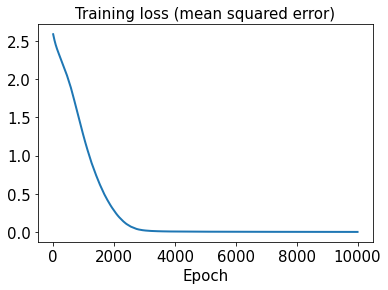

In [46]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

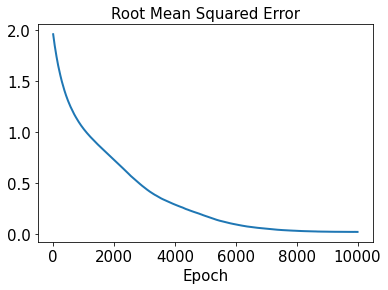

In [47]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [49]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [50]:
error_train_abs3 = np.abs(decoded_sensor_train3 - x_train3)

In [51]:
error_test_abs3 = np.abs(decoded_sensor_test3 - x_test3)

In [52]:
error_train_abs3

array([[[4.72256242e-02],
        [2.29751060e-02],
        [2.70480944e-02],
        [4.42231612e-02],
        [2.33205807e-02],
        [1.36957557e-02],
        [1.34396347e-02],
        [2.19754489e-02],
        [2.73641250e-02],
        [1.28042494e-02],
        [1.36536440e-02],
        [3.20051527e-02],
        [3.91156155e-02],
        [2.16888967e-02],
        [2.23549519e-02],
        [4.77423095e-02]],

       [[9.36335407e-03],
        [4.39005911e-03],
        [7.30618115e-03],
        [5.63360819e-03],
        [1.47929584e-03],
        [7.15902009e-04],
        [5.35165851e-04],
        [1.10744408e-03],
        [4.91314098e-03],
        [4.26397883e-04],
        [7.85539056e-04],
        [4.56991857e-03],
        [4.37226877e-03],
        [1.32487956e-03],
        [2.03671618e-03],
        [8.89316029e-03]],

       [[3.25244685e-02],
        [1.51795040e-02],
        [1.67598569e-02],
        [2.84411589e-02],
        [1.69887477e-02],
        [1.04978959e-02],
        

In [53]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.018954023101241616


In [54]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.029884437361530604
